# Beer Profiles and Rating Study


## Project goals


1) Building machine learning models that can predict a beer's alcohol content and rating, gaining some insights into the characteristics that make a highly-rated beer - a rating of 4 and more on a 0 to 5 scale. 

2) Building a beer recommendation system based on similarities with the user's favourite beer or preffered tasting profile


**Modules Used**

Pandas, Numpy, Scikit-learn, Seaborn, Matplotlib, Scipy, Math, Stats

**Dataset Description**

The dataset holds information on 3197 unique beers and 934 different breweries.

**Questions**

Which features predominantly impact the beer rating? 

What is the most popular tasting profile?

Which are the most popular breweries ?

Which features are responsible for higher alcohol content?

How many beer clusters exist among these 3197 unique beers?

**Workflow**

Data exploration -> Exploratory Data Analysis -> Feature Engineering -> Feature Extraction -> Modeling & Model Evaluation

##### Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import string 


import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
sns.set_style("whitegrid")

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from collections import Counter
from sklearn.datasets import make_classification

from numpy import where

import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import chi2
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.special import inv_boxcox   
import os #we will use the function listdir to list files in a folder
import math
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss, acf, grangercausalitytests
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf,month_plot,quarter_plot
from scipy import signal
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

%matplotlib inline

pd.set_option('display.max_columns', None)

import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

##### Useful functions

In [2]:
# Checking the NaNs
def check_nan(df):
    nulls = pd.DataFrame(df.isna().sum()/len(df))
    nulls= nulls.reset_index()
    nulls.columns = ['column_name', 'Percentage Null Values']
    nulls.sort_values(by='Percentage Null Values', ascending = False)
    return nulls

# Checking the value_counts
def check_count(df):
    value_counts = []
    for column in df.columns:
        x = len(df[column].value_counts())
        value_counts.append(x)
    counts = pd.DataFrame(value_counts)
    counts = counts.reset_index()
    counts.columns = ['name', 'value_counts']
    for i in range(0, df.shape[1]):
        counts['name'] = counts['name'].replace(i,df.columns[i])
    return counts

## Data extraction

In [3]:
data = pd.read_csv('beer_profile_and_ratings.csv')
print(data.shape)
data.head()

(3197, 25)


Name    Style  \
0                         Amber  Altbier   
1                    Double Bag  Altbier   
2                Long Trail Ale  Altbier   
3                  Doppelsticke  Altbier   
4  Sleigh'r Dark Doüble Alt Ale  Altbier   

                                            Brewery  \
0                               Alaskan Brewing Co.   
1                            Long Trail Brewing Co.   
2                            Long Trail Brewing Co.   
3  Uerige Obergärige Hausbrauerei GmbH / Zum Uerige   
4                           Ninkasi Brewing Company   

                                    Beer Name (Full)  \
0                  Alaskan Brewing Co. Alaskan Amber   
1                  Long Trail Brewing Co. Double Bag   
2              Long Trail Brewing Co. Long Trail Ale   
3  Uerige Obergärige Hausbrauerei GmbH / Zum Ueri...   
4  Ninkasi Brewing Company Sleigh'r Dark Doüble A...   

                                         Description  ABV  Min IBU  Max IBU  \
0  Notes:Richly malty and long on the palate, wit...  5.3       25       50   
1  Notes:This malty, full-bodied double alt is al...  7.2       25       50   
2  Notes:Long Trail Ale is a full-bodied amber al...  5.0       25       50   
3                                             Notes:  8.5       25       50   
4  Notes:Called 'Dark Double Alt' on the label.Se...  7.2       25       50   

   Astringency  Body  Alcohol  Bitter  Sweet  Sour  Salty  Fruits  Hoppy  \
0           13    32        9      47     74    33      0      33     57   
1           12    57       18      33     55    16      0      24     35   
2           14    37        6      42     43    11      0      10     54   
3           13    55       31      47    101    18      1      49     40   
4           25    51       26      44     45     9      1      11     51   

   Spices  Malty  review_aroma  review_appearance  review_palate  \
0       8    111      3.498994           3.636821       3.556338   
1      12     84      3.798337           3.846154       3.904366   
2       4     62      3.409814           3.667109       3.600796   
3      16    119      4.148098           4.033967       4.150815   
4      20     95      3.625000           3.973958       3.734375   

   review_taste  review_overall  number_of_reviews  
0      3.643863        3.847082                497  
1      4.024948        4.034304                481  
2      3.631300        3.830239                377  
3      4.205163        4.005435                368  
4      3.765625        3.817708                 96

##### Harmonizing the column names

In [4]:
data.columns = [column.lower().replace(' ', '_') for column in data.columns] 
data.columns

Index(['name', 'style', 'brewery', 'beer_name_(full)', 'description', 'abv',
       'min_ibu', 'max_ibu', 'astringency', 'body', 'alcohol', 'bitter',
       'sweet', 'sour', 'salty', 'fruits', 'hoppy', 'spices', 'malty',
       'review_aroma', 'review_appearance', 'review_palate', 'review_taste',
       'review_overall', 'number_of_reviews'],
      dtype='object')

## Data Exploration

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197 entries, 0 to 3196
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               3197 non-null   object 
 1   style              3197 non-null   object 
 2   brewery            3197 non-null   object 
 3   beer_name_(full)   3197 non-null   object 
 4   description        3197 non-null   object 
 5   abv                3197 non-null   float64
 6   min_ibu            3197 non-null   int64  
 7   max_ibu            3197 non-null   int64  
 8   astringency        3197 non-null   int64  
 9   body               3197 non-null   int64  
 10  alcohol            3197 non-null   int64  
 11  bitter             3197 non-null   int64  
 12  sweet              3197 non-null   int64  
 13  sour               3197 non-null   int64  
 14  salty              3197 non-null   int64  
 15  fruits             3197 non-null   int64  
 16  hoppy              3197 

The categorical data and the numerical data have the right data types.

In [6]:
data.describe()

abv      min_ibu      max_ibu  astringency         body  \
count  3197.000000  3197.000000  3197.000000  3197.000000  3197.000000   
mean      6.526688    21.180482    38.986863    16.515796    46.129496   
std       2.546997    13.242242    21.355281    10.410661    25.947842   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       5.000000    15.000000    25.000000     9.000000    29.000000   
50%       6.000000    20.000000    35.000000    14.000000    40.000000   
75%       7.600000    25.000000    45.000000    21.000000    58.000000   
max      57.500000    65.000000   100.000000    81.000000   175.000000   

           alcohol       bitter        sweet         sour        salty  \
count  3197.000000  3197.000000  3197.000000  3197.000000  3197.000000   
mean     17.055990    36.364404    58.270879    33.145449     1.017204   
std      17.331334    25.791152    34.281310    35.780172     2.132651   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       6.000000    17.000000    33.000000    11.000000     0.000000   
50%      11.000000    31.000000    54.000000    22.000000     0.000000   
75%      22.000000    52.000000    77.000000    42.000000     1.000000   
max     139.000000   150.000000   263.000000   284.000000    48.000000   

            fruits        hoppy       spices        malty  review_aroma  \
count  3197.000000  3197.000000  3197.000000  3197.000000   3197.000000   
mean     38.529559    40.924617    18.345637    75.330935      3.638789   
std      32.296646    30.403641    23.756582    39.909338      0.503209   
min       0.000000     0.000000     0.000000     0.000000      1.509615   
25%      12.000000    18.000000     4.000000    45.000000      3.422559   
50%      29.000000    33.000000    10.000000    73.000000      3.720183   
75%      60.000000    56.000000    23.000000   103.000000      3.978000   
max     175.000000   172.000000   184.000000   239.000000      5.000000   

       review_appearance  review_palate  review_taste  review_overall  \
count        3197.000000    3197.000000   3197.000000     3197.000000   
mean            3.754393       3.660428      3.702496        3.747522   
std             0.403416       0.449937      0.510361        0.444288   
min             1.571429       1.285714      1.214286        1.136364   
25%             3.604651       3.470021      3.500000        3.566667   
50%             3.833333       3.741667      3.791667        3.830239   
75%             4.000000       3.965587      4.033333        4.032847   
max             4.666667       5.000000      5.000000        5.000000   

       number_of_reviews  
count        3197.000000  
mean          233.284955  
std           361.811847  
min             1.000000  
25%            23.000000  
50%            93.000000  
75%           284.000000  
max          3290.000000

In [7]:
nans = check_nan(data)
nans

column_name  Percentage Null Values
0                name                     0.0
1               style                     0.0
2             brewery                     0.0
3    beer_name_(full)                     0.0
4         description                     0.0
5                 abv                     0.0
6             min_ibu                     0.0
7             max_ibu                     0.0
8         astringency                     0.0
9                body                     0.0
10            alcohol                     0.0
11             bitter                     0.0
12              sweet                     0.0
13               sour                     0.0
14              salty                     0.0
15             fruits                     0.0
16              hoppy                     0.0
17             spices                     0.0
18              malty                     0.0
19       review_aroma                     0.0
20  review_appearance                     0.0
21      review_palate                     0.0
22       review_taste                     0.0
23     review_overall                     0.0
24  number_of_reviews                     0.0

There is no NaN in this dataset.

In [8]:
len(data.name.unique())

3066

There are 3066 unique values in Name, which means different brewery have given the same name to one of their beer or there are duplicates.

In [9]:
number_of_values = check_count(data)
number_of_values

name  value_counts
0                name          3066
1               style           111
2             brewery           934
3    beer_name_(full)          3197
4         description          1841
5                 abv           194
6             min_ibu            21
7             max_ibu            25
8         astringency            66
9                body           149
10            alcohol           104
11             bitter           133
12              sweet           183
13               sour           192
14              salty            21
15             fruits           149
16              hoppy           153
17             spices           138
18              malty           196
19       review_aroma          2326
20  review_appearance          2257
21      review_palate          2324
22       review_taste          2356
23     review_overall          2325
24  number_of_reviews           811

## Exploratory data analysis

In [10]:
## Useful functions - EDA

def check_dist(df, a, b):
    # initialize plot counter
    c = 1 
    fig = plt.figure(figsize = (16, 14))
    
    # iterate over the columns on the subplot grid
    for column in df.columns:
        plt.subplot(a, b, c)
        plt.title('{}'.format(column, a, b, c))
        plt.xlabel(column)
        sns.distplot(df[column])
        c = c + 1
    plt.tight_layout()
    plt.show()
    return ()


# Do the same with continuous variables 
def scatter(df, target, a, b):
    # initialize plot counter
    c = 1 
    fig = plt.figure(figsize = (16, 14))
    
    # exclude the target
    cols_to_include = df.loc[:, df.columns != target]
    
    # iterate over the columns on the subplot grid
    for column in cols_to_include:
        plt.subplot(a, b, c)
        plt.title('{}'.format(column, a, b, c))
        plt.xlabel(column)
        sns.scatterplot(df[column], df[target])
        c = c + 1
    plt.tight_layout()
    plt.show()
    return ()

def boxplot(df, a, b):
    # initialize plot counter
    c = 1 
    fig = plt.figure(figsize = (16, 14))
    
    # iterate over the columns on the subplot grid
    for column in df.columns:
        plt.subplot(a, b, c)
        plt.title('{}'.format(column, a, b, c))
        plt.xlabel(column)
        sns.boxplot(x=df[column])
        c = c + 1
    plt.tight_layout()
    plt.show()
    return ()
        
def heatmap(df):
    mask = np.zeros_like(df.corr())
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(16, 12))
    ax = sns.heatmap(df.corr(), mask=mask, annot=True, cmap='Blues')
    m = ax.get_figure()
    plt.show()
    return m

def countplot(df):
    # initialize plot counter
    c = 1 
    fig = plt.figure(figsize = (16, 14))
    
    # iterate over the columns on the subplot grid
    for column in df.columns:
        plt.subplot(a, b, c)
        plt.title('{}'.format(column, a, b, c))
        plt.xlabel(column)
        sns.countplot(x=df[column], palette='Blues')
        c = c + 1
    plt.tight_layout()
    plt.show()
    return ()

In [11]:
# separating the categorical and numerical variables for EDA
categoricals = data.select_dtypes(np.object)
numericals = data.select_dtypes(np.number)

In [12]:
categoricals

name          style  \
0                                        Amber        Altbier   
1                                   Double Bag        Altbier   
2                               Long Trail Ale        Altbier   
3                                 Doppelsticke        Altbier   
4                 Sleigh'r Dark Doüble Alt Ale        Altbier   
...                                        ...            ...   
3192                           Winter Shredder  Winter Warmer   
3193                        The First Snow Ale  Winter Warmer   
3194                       Red Nose Winter Ale  Winter Warmer   
3195                      Fish Tale Winterfish  Winter Warmer   
3196  Frosted Frog Christmas Ale - Barrel-Aged  Winter Warmer   

                                               brewery  \
0                                  Alaskan Brewing Co.   
1                               Long Trail Brewing Co.   
2                               Long Trail Brewing Co.   
3     Uerige Obergärige Hausbrauerei GmbH / Zum Uerige   
4                              Ninkasi Brewing Company   
...                                                ...   
3192                                Cisco Brewers Inc.   
3193                        RJ Rockers Brewing Company   
3194                  Natty Greene's Pub & Brewing Co.   
3195           Fish Brewing Company / Fishbowl Brewpub   
3196                              Hoppin' Frog Brewery   

                                       beer_name_(full)  \
0                     Alaskan Brewing Co. Alaskan Amber   
1                     Long Trail Brewing Co. Double Bag   
2                 Long Trail Brewing Co. Long Trail Ale   
3     Uerige Obergärige Hausbrauerei GmbH / Zum Ueri...   
4     Ninkasi Brewing Company Sleigh'r Dark Doüble A...   
...                                                 ...   
3192                 Cisco Brewers Inc. Winter Shredder   
3193          RJ Rockers Brewing Company First Snow Ale   
3194  Natty Greene's Pub & Brewing Co. Red Nose Wint...   
3195  Fish Brewing Company / Fishbowl Brewpub Fish T...   
3196  Hoppin' Frog Brewery Barrel Aged Frosted Frog ...   

                                            description  
0     Notes:Richly malty and long on the palate, wit...  
1     Notes:This malty, full-bodied double alt is al...  
2     Notes:Long Trail Ale is a full-bodied amber al...  
3                                                Notes:  
4     Notes:Called 'Dark Double Alt' on the label.Se...  
...                                                 ...  
3192                                             Notes:  
3193  Notes:This hearty American pale ale contains a...  
3194                                             Notes:  
3195                                             Notes:  
3196  Notes:The essence of Christmas is captured in ...  

[3197 rows x 5 columns]

In [13]:
numericals

abv  min_ibu  max_ibu  astringency  body  alcohol  bitter  sweet  sour  \
0     5.3       25       50           13    32        9      47     74    33   
1     7.2       25       50           12    57       18      33     55    16   
2     5.0       25       50           14    37        6      42     43    11   
3     8.5       25       50           13    55       31      47    101    18   
4     7.2       25       50           25    51       26      44     45     9   
...   ...      ...      ...          ...   ...      ...     ...    ...   ...   
3192  8.8       35       50           15    37       24      35     46    19   
3193  6.0       35       50           15    31       23      16     54    43   
3194  6.8       35       50            8    44       24      19     52    21   
3195  7.5       35       50           11    36       50      70     72    59   
3196  8.6       35       50            8    50       49      13     71    17   

      salty  fruits  hoppy  spices  malty  review_aroma  review_appearance  \
0         0      33     57       8    111      3.498994           3.636821   
1         0      24     35      12     84      3.798337           3.846154   
2         0      10     54       4     62      3.409814           3.667109   
3         1      49     40      16    119      4.148098           4.033967   
4         1      11     51      20     95      3.625000           3.973958   
...     ...     ...    ...     ...    ...           ...                ...   
3192      0      23     45      67     74      4.125000           3.875000   
3193      0      54     14     140     58      3.950000           3.750000   
3194      0      26     21      96     77      3.576923           3.711538   
3195      0      81    110      18     73      3.902299           3.885057   
3196      0      33     16     148     69      3.888889           3.694444   

      review_palate  review_taste  review_overall  number_of_reviews  
0          3.556338      3.643863        3.847082                497  
1          3.904366      4.024948        4.034304                481  
2          3.600796      3.631300        3.830239                377  
3          4.150815      4.205163        4.005435                368  
4          3.734375      3.765625        3.817708                 96  
...             ...           ...             ...                ...  
3192       3.875000      3.750000        4.000000                  4  
3193       3.760000      3.790000        3.730000                 50  
3194       3.596154      3.673077        3.711538                 26  
3195       3.862069      3.902299        3.879310                 87  
3196       3.833333      3.555556        3.527778                 18  

[3197 rows x 20 columns]

### Plotting the numerical data

###### Plotting the distributions

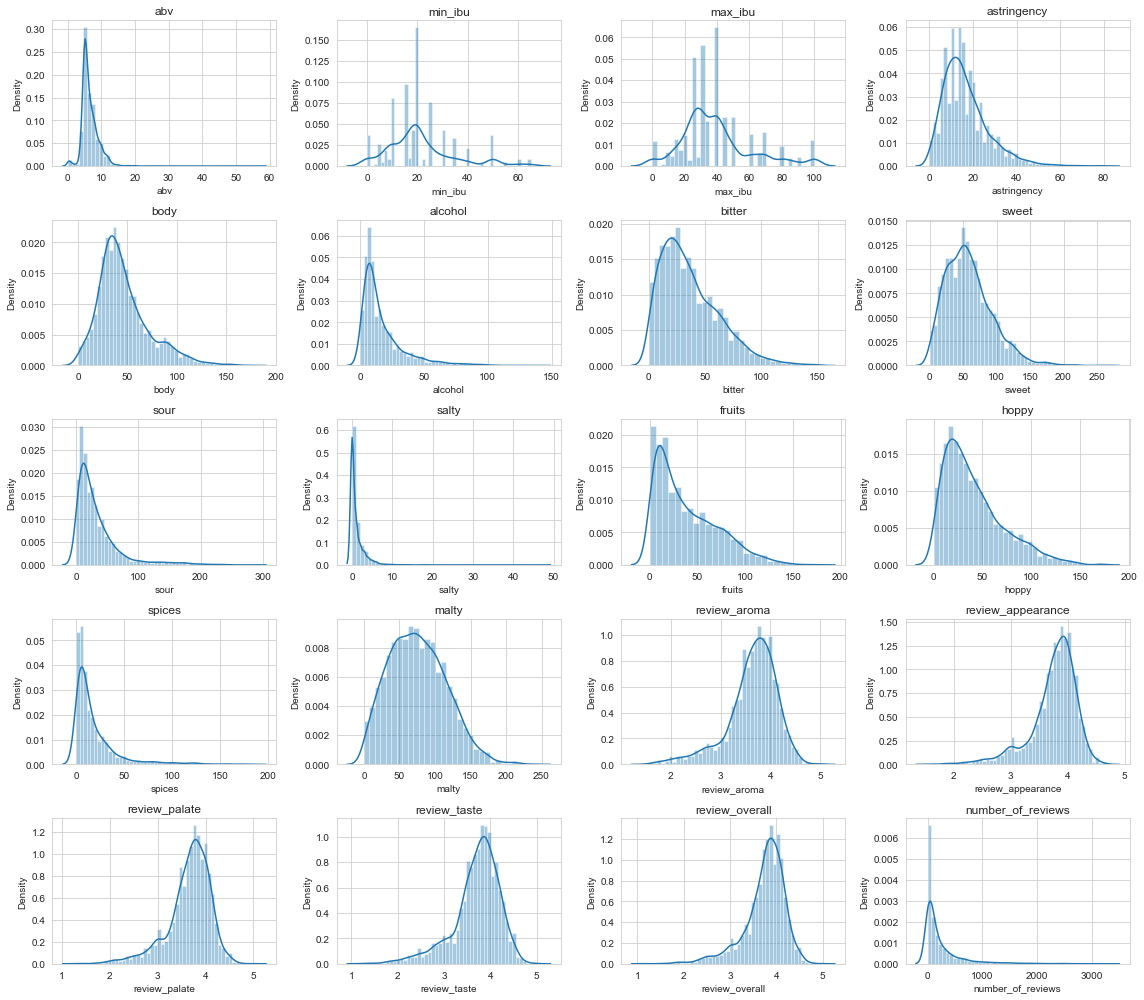

In [14]:
distributions = check_dist(numericals, 5, 4)

It appears that most of the distribtutions are similar to skewed normal distributions which could indicate the presence of outliers. \
It also looks like there are a lot of beers that have a small amount of reviews.

In [15]:
data.number_of_reviews.value_counts()

2      80
3      70
1      69
4      64
5      43
       ..
191     1
260     1
584     1
477     1
613     1
Name: number_of_reviews, Length: 811, dtype: int64

###### Creating pairplots

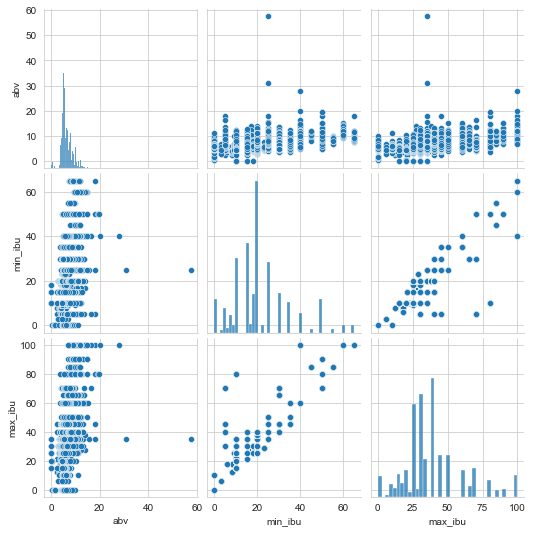

In [16]:
# pairplot with the ABV and bitterness variables
sns.pairplot(numericals[['abv', 'min_ibu', 'max_ibu']])

It looks like there is no linear correlation between the `abv` and the bitterness variables.
Unsurprisingly `min_ibu` and `max_ibu` are correlated and symmetrical.

In [17]:
data.columns

Index(['name', 'style', 'brewery', 'beer_name_(full)', 'description', 'abv',
       'min_ibu', 'max_ibu', 'astringency', 'body', 'alcohol', 'bitter',
       'sweet', 'sour', 'salty', 'fruits', 'hoppy', 'spices', 'malty',
       'review_aroma', 'review_appearance', 'review_palate', 'review_taste',
       'review_overall', 'number_of_reviews'],
      dtype='object')

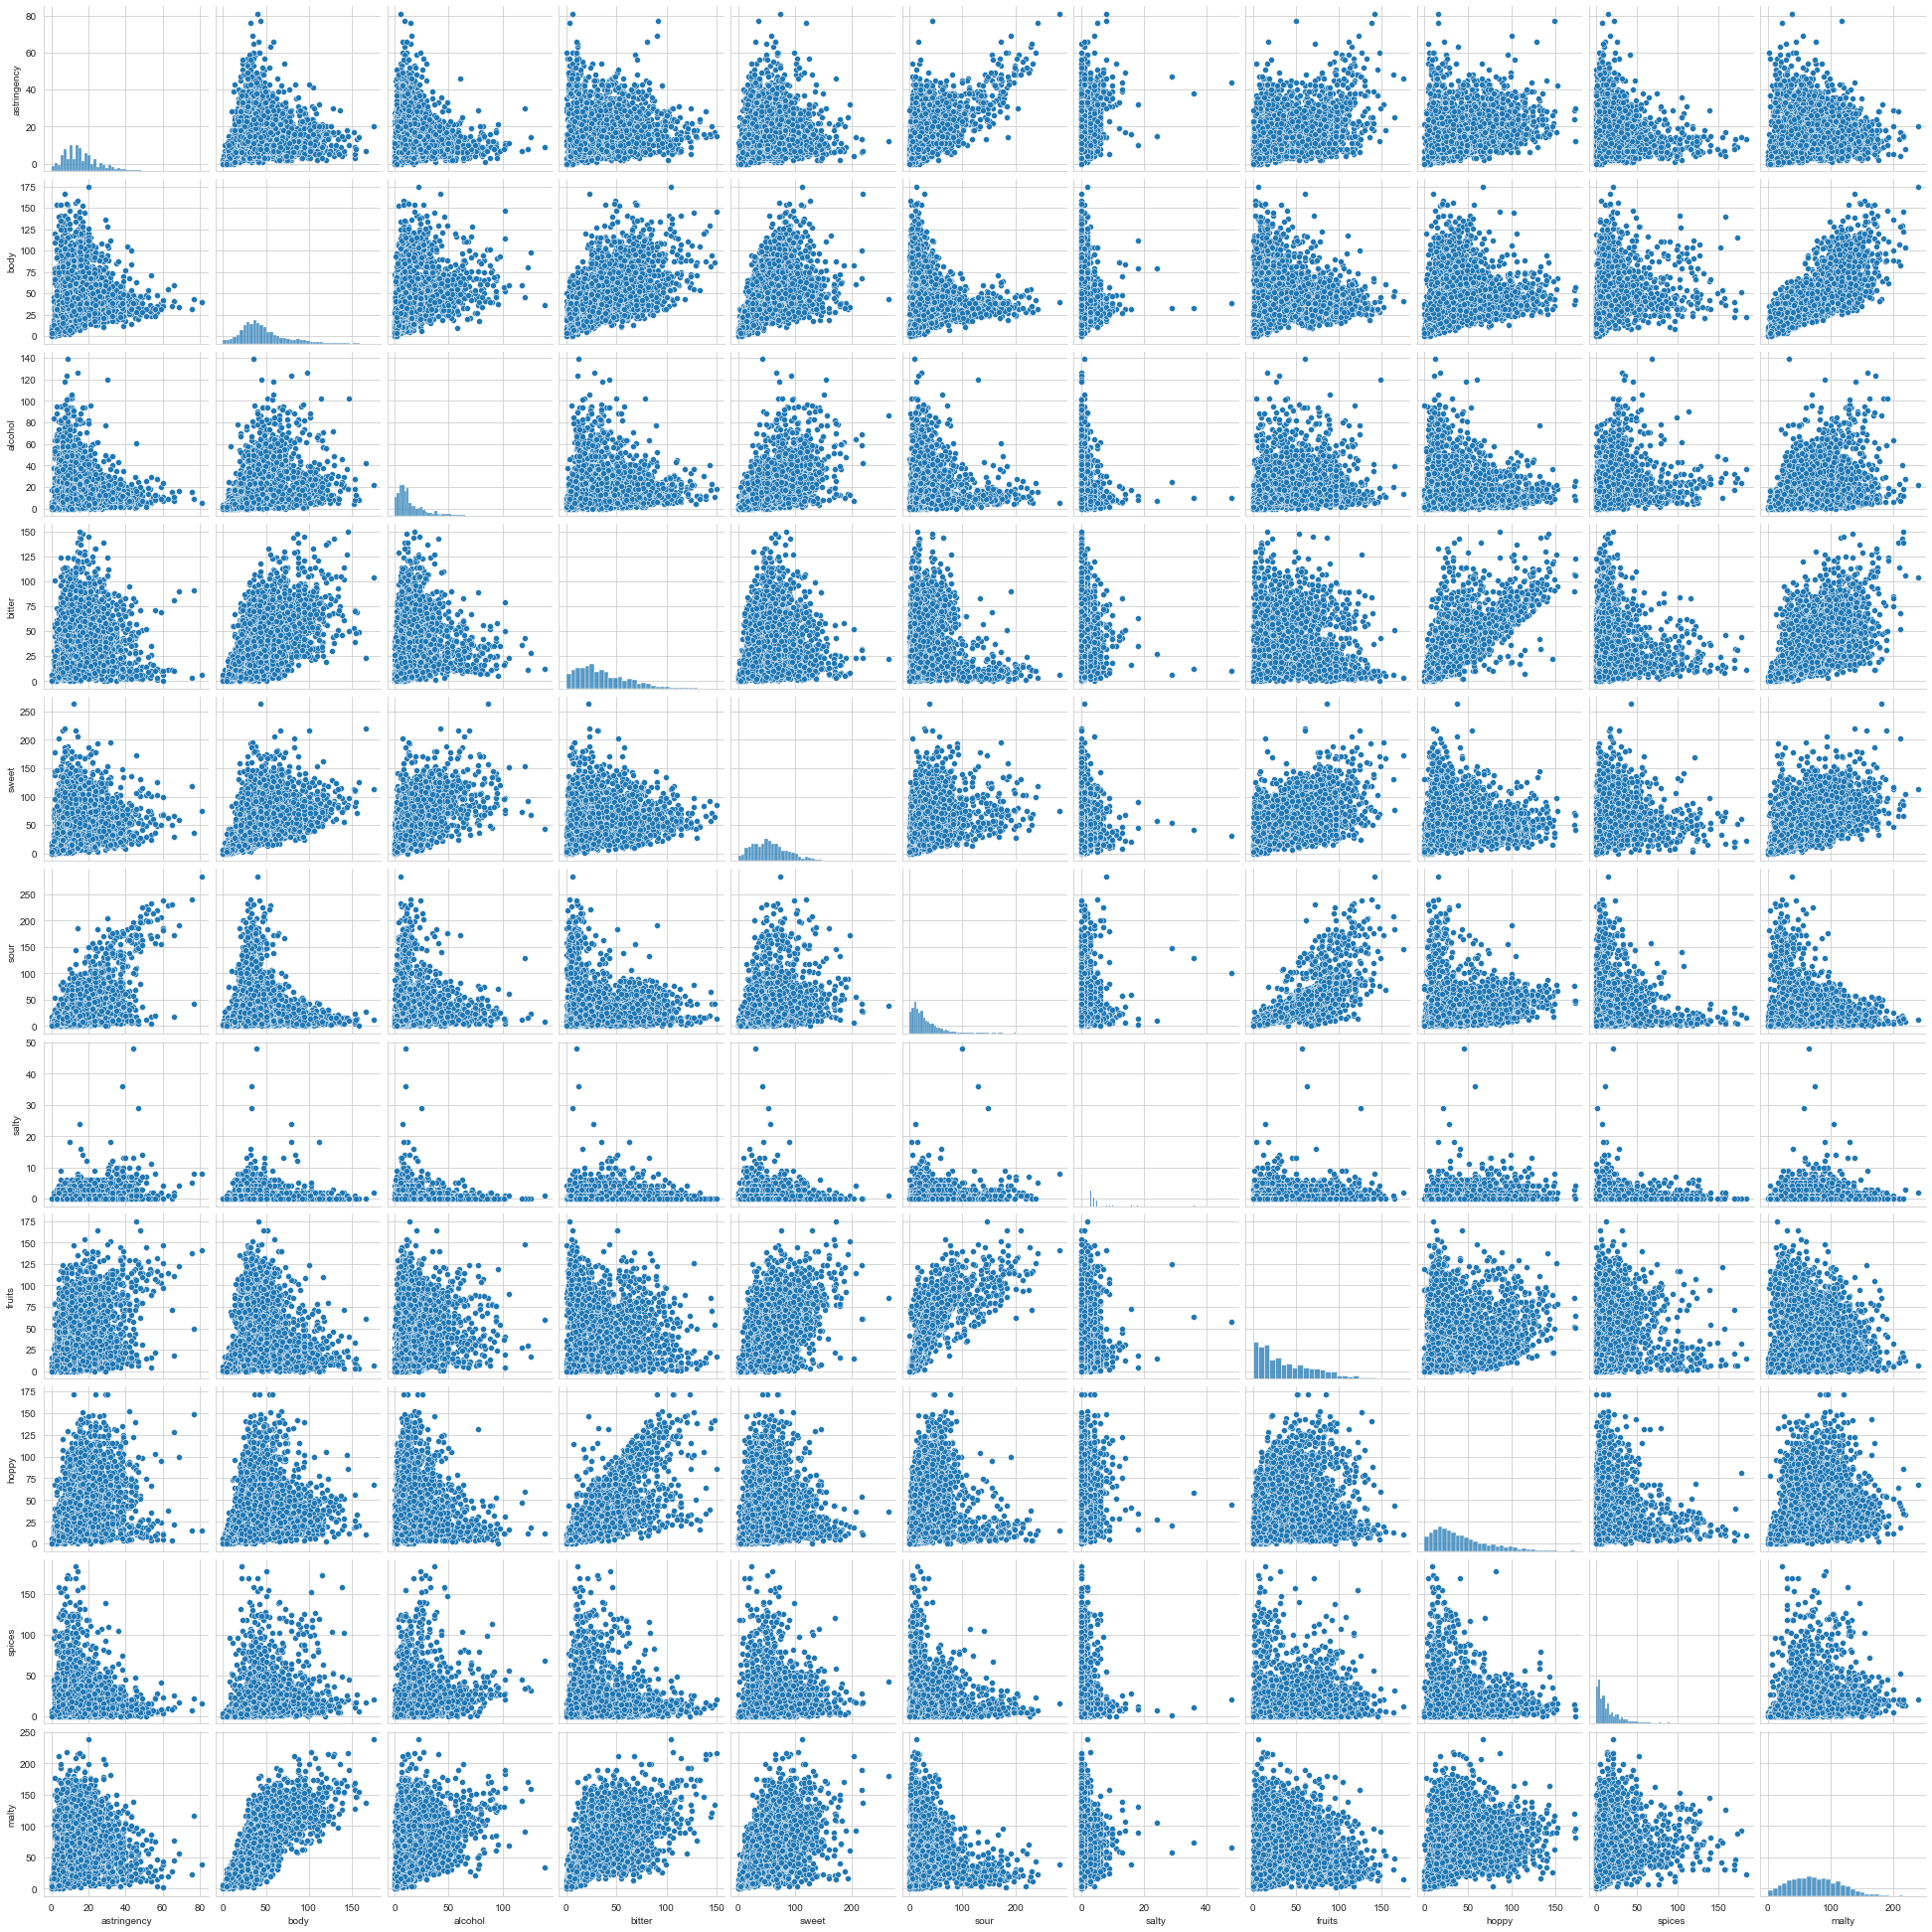

In [18]:
# pairplot with the falvor profile variables
sns.pairplot(numericals[['astringency', 'body', 'alcohol', 'bitter',
       'sweet', 'sour', 'salty', 'fruits', 'hoppy', 'spices', 'malty']])

We can observe some stronger correlations between `astringency` & `sour`, `body` & `malty`, `body` & `bitter` and `bitter` & `hoppy`. `alcohol` & `sweet` are also correlated albeit not as much as the former variables.
`fruits` and especially `salty` seem to have almost no correlations with the other variables except for `fruits` & `sour`.

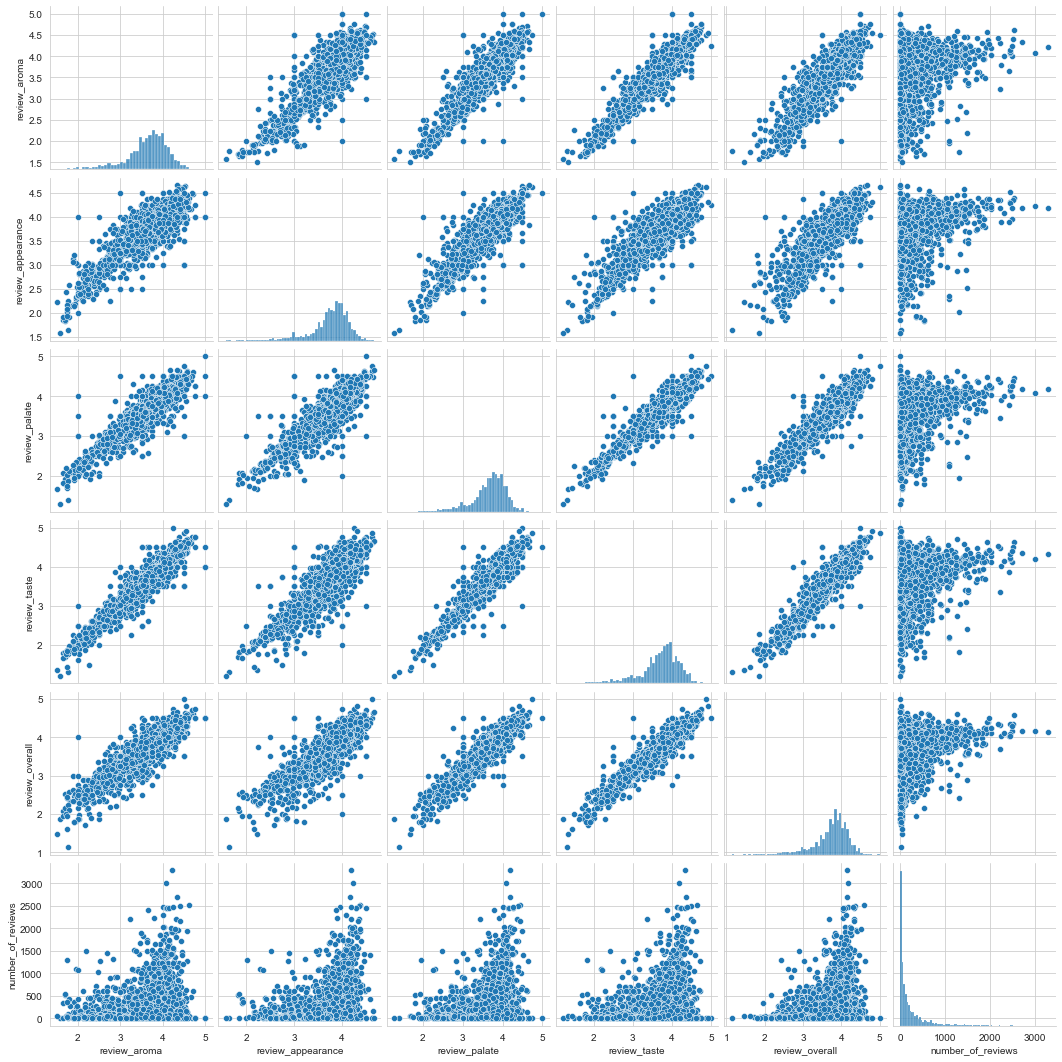

In [19]:
# pairplot with the review variables
sns.pairplot(numericals[['review_aroma', 'review_appearance', 'review_palate', 'review_taste',
       'review_overall', 'number_of_reviews']])

We can observe strong correlations between the review variables except for `number_of_reviews`

###### Scatter plots between the numerical variables and `abv`

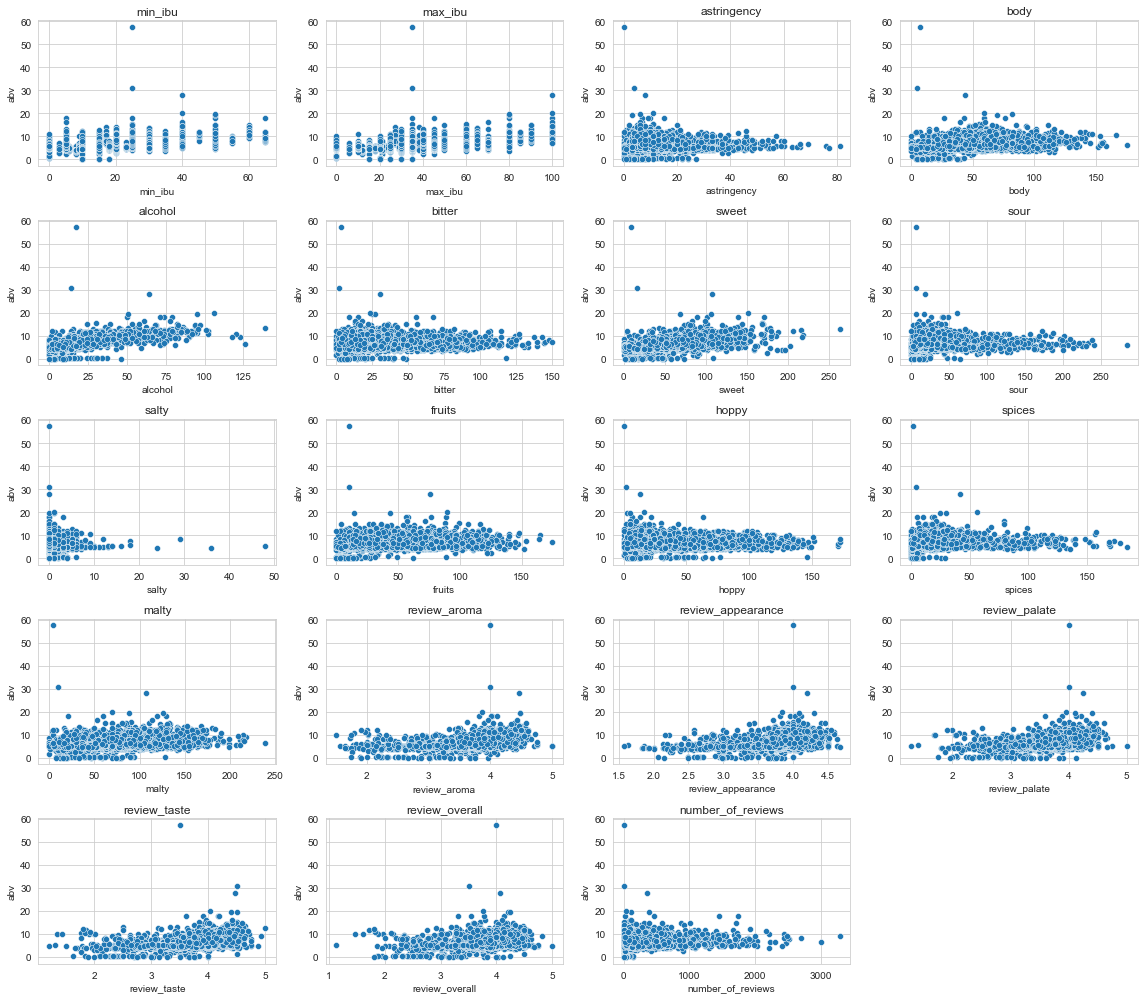

In [20]:
scatterplots = scatter(numericals, 'abv', 5, 4)

###### Scatter plots between the numerical variables and `review_overall`

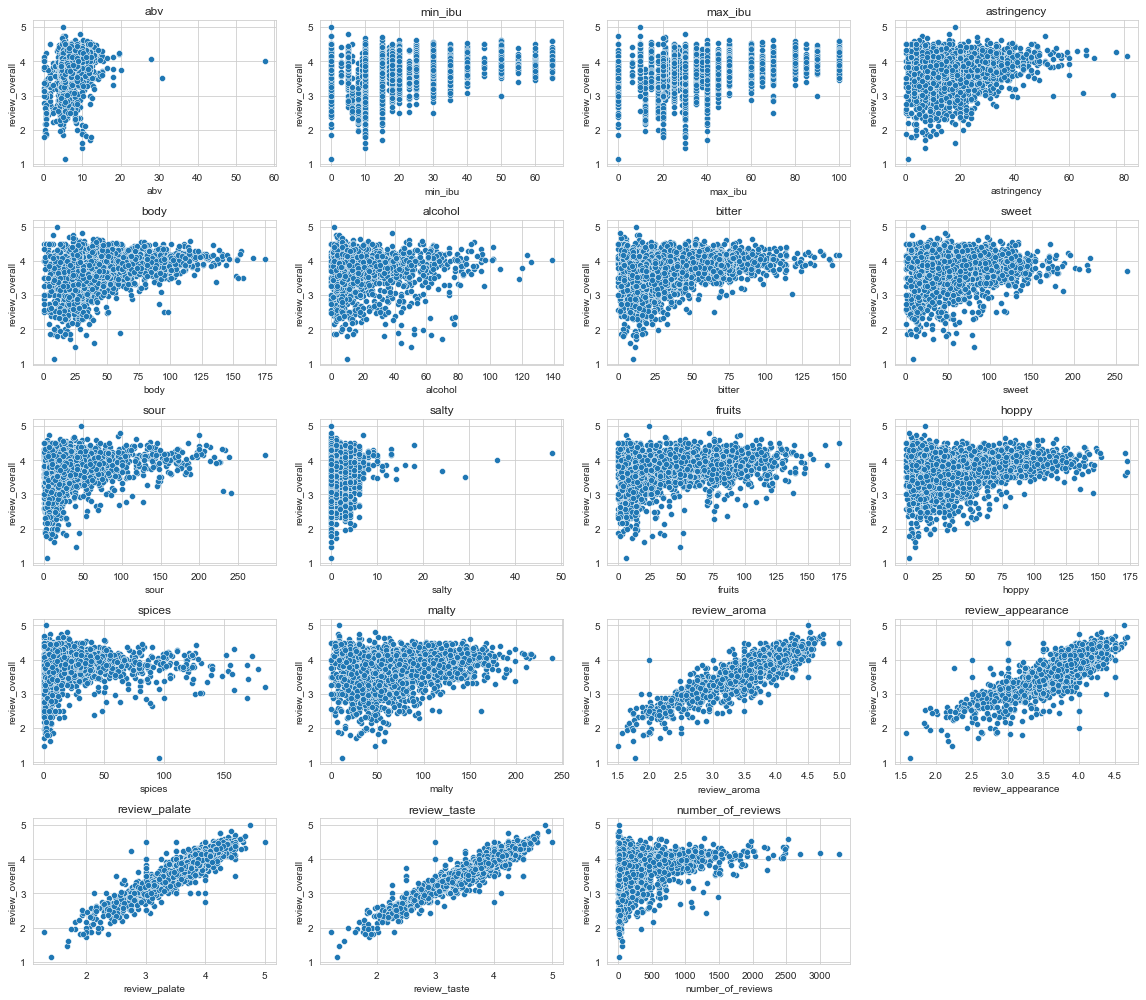

In [21]:
scatterplots = scatter(numericals, 'review_overall', 5, 4)

###### Box-plots

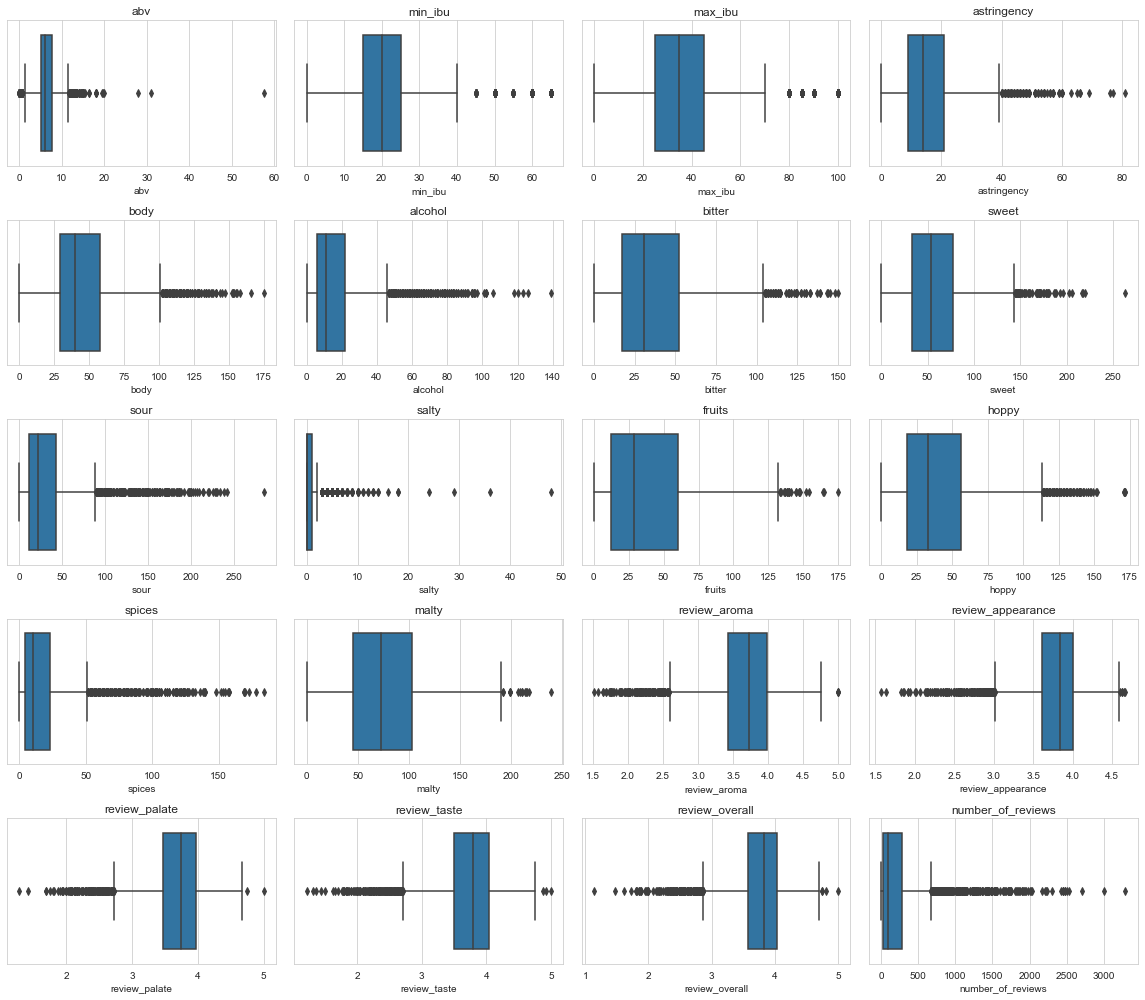

In [22]:
boxplots = boxplot(numericals, 5, 4)

There are quite a lot of outliers.

##### Heatmaps

`abv` heatmap

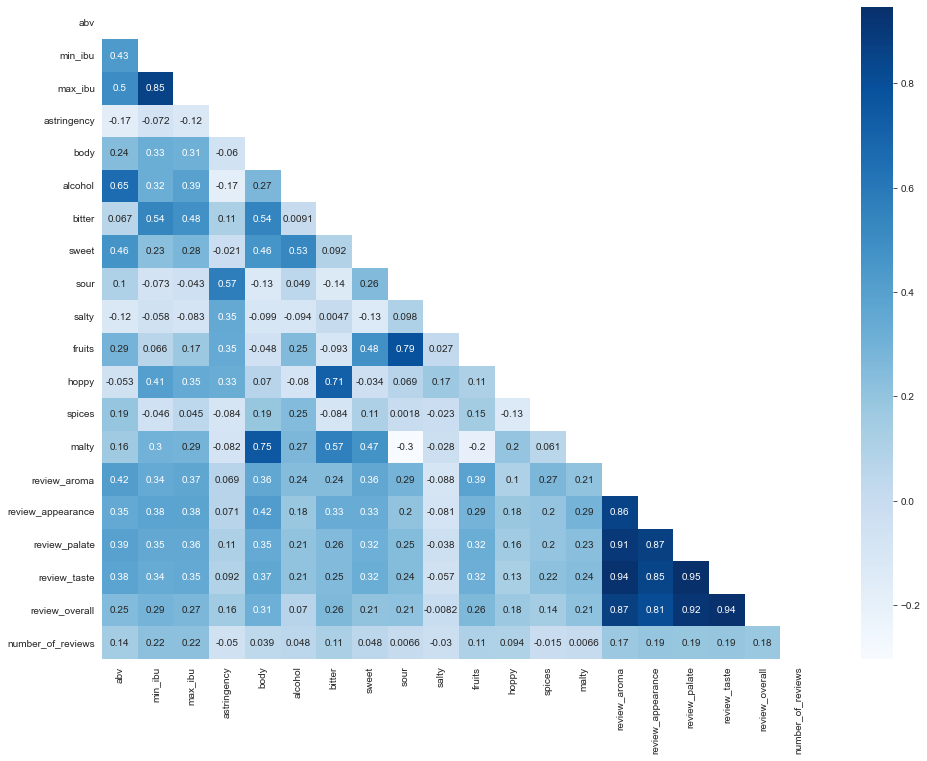

In [23]:
map_1 = heatmap(numericals)

`alcohol`, `max_ibu`, `min_ibu`, `sweet` and `review_aroma` have the strongest correlations with `abv`.
We observe some very strong correlations within the review variables, we might have to remove the least correlated to the target `review_overall` to avoid multicolinearity.
Apart fromt the other review targets, `body`, `min_ibu`, `max_ibu`, `bitter`,  `fruits` and `abv` are the most correlated to `review_overall`.

### Exploring the categorical data

###### Exploring `name` and `beer_name_(full)`

`Name`

In [24]:
name_1 = data[data['name'] == 'Oktoberfest']
name_1

name                         style  \
1455  Oktoberfest  Lager - Märzen / Oktoberfest   
1459  Oktoberfest  Lager - Märzen / Oktoberfest   
1462  Oktoberfest  Lager - Märzen / Oktoberfest   
1468  Oktoberfest  Lager - Märzen / Oktoberfest   
1475  Oktoberfest  Lager - Märzen / Oktoberfest   
1479  Oktoberfest  Lager - Märzen / Oktoberfest   
1481  Oktoberfest  Lager - Märzen / Oktoberfest   
1483  Oktoberfest  Lager - Märzen / Oktoberfest   
1486  Oktoberfest  Lager - Märzen / Oktoberfest   
1490  Oktoberfest  Lager - Märzen / Oktoberfest   
1568  Oktoberfest                Lager - Vienna   
2938  Oktoberfest    Wheat Beer - American Dark   

                                brewery  \
1455        Great Lakes Brewing Company   
1459  Jacob Leinenkugel Brewing Company   
1462          Left Hand Brewing Company   
1468                  Yuengling Brewery   
1475             Summit Brewing Company   
1479       Saint Arnold Brewing Company   
1481         Blue Point Brewing Company   
1483            Sly Fox Brewing Company   
1486                    Capital Brewery   
1490           Sprecher Brewing Company   
1568      Hinterland Brewery Restaurant   
2938            Schmohz Brewing Company   

                                       beer_name_(full)  \
1455  Great Lakes Brewing Company Great Lakes Oktobe...   
1459  Jacob Leinenkugel Brewing Company Leinenkugel'...   
1462    Left Hand Brewing Company Left Hand Oktoberfest   
1468                      Yuengling Brewery Oktoberfest   
1475   Summit Brewing Company Summit Oktoberfest Marzen   
1479  Saint Arnold Brewing Company Saint Arnold Okto...   
1481  Blue Point Brewing Company Blue Point Oktoberfest   
1483                Sly Fox Brewing Company Oktoberfest   
1486                        Capital Brewery Oktoberfest   
1490               Sprecher Brewing Company Oktoberfest   
1568          Hinterland Brewery Restaurant Oktoberfest   
2938                Schmohz Brewing Company Oktoberfest   

                                            description   abv  min_ibu  \
1455  Notes:Prost! Our take on this classic German s...  6.50       18   
1459  Notes:Rich and toasty Märzen-style beerOur pro...  5.10       18   
1462  Notes:This is no festivus for the restivus, on...  6.60       18   
1468  Notes:Yuengling® is proud to offer our Oktober...  5.45       18   
1475  Notes:Brewed in the classic Märzen style with ...  6.50       18   
1479  Notes:A full bodied, malty, slightly sweet bee...  6.60       18   
1481  Notes:Originally brewed a couple hundred years...  5.50       18   
1483  Notes:Ein prosit! This seasonal gem is best en...  6.10       18   
1486  Notes:2014 GABF Gold Medal (German-Style Marze...  5.50       18   
1490  Notes:Gold Medal Winner in the German-style/Ok...  6.00       18   
1568  Notes:Joe, our Brew Master, went to Munich for...  6.00       15   
2938                                             Notes:  5.20       10   

      max_ibu  astringency  body  alcohol  bitter  sweet  sour  salty  fruits  \
1455       25           16    36       16      41     63    13      3      20   
1459       25           16    22        3      26     36    10      0       9   
1462       25           16    32       22      41     63     5      0       9   
1468       25           17    28       11      26     52     7      0      13   
1475       25           12    37       23      36     73    28      2      28   
1479       25           11    35       13      27     52    12      2      18   
1481       25           15    40        2      34     53     9      0      20   
1483       25           19    43        1      36     53    16      0      19   
1486       25           13    36        5      35     67    18      4      23   
1490       25           16    38        8      25     73    15      1      20   
1568       30           26    61       16      70     35    26      2      22   
2938       35            4    13        0       5     12    14      0       2   

    

In [25]:
name_2 = data[data['name'] == 'Faro']
name_2

name          style                                brewery  \
1583  Faro  Lambic - Faro                    Brasserie Cantillon   
1587  Faro  Lambic - Faro  Brouwerij Timmermans-John Martin N.V.   

                                       beer_name_(full)  \
1583                 Brasserie Cantillon Cantillon Faro   
1587  Brouwerij Timmermans-John Martin N.V. Timmerma...   

                                            description  abv  min_ibu  \
1583                                             Notes:  5.0        0   
1587  Notes:Formerly Tradition Faro Lambic.Timmerman...  4.0        0   

      max_ibu  astringency  body  alcohol  bitter  sweet  sour  salty  fruits  \
1583       10           12    58        6      17     92    85      0      37   
1587       10           10    20        2       2     89    79      1      54   

      hoppy  spices  malty  review_aroma  review_appearance  review_palate  \
1583     21      21     44         3.875              3.875       3.854167   
1587      7       5     26         3.600              3.900       3.800000   

      review_taste  review_overall  number_of_reviews  
1583      3.916667        3.916667                 24  
1587      3.800000        3.700000                  5

From this two examples we can assume that there are no duplicates in `name`, different breweries have simply given the same name to one of their beer.
We can still do a final check:

In [26]:
#find duplicate rows across all columns
duplicates = data[data.duplicated()]
duplicates

Empty DataFrame
Columns: [name, style, brewery, beer_name_(full), description, abv, min_ibu, max_ibu, astringency, body, alcohol, bitter, sweet, sour, salty, fruits, hoppy, spices, malty, review_aroma, review_appearance, review_palate, review_taste, review_overall, number_of_reviews]
Index: []

`beer_name_(full)`

In [27]:
len(data['beer_name_(full)']) - data.shape[0]

0

`name` and `beer_name_(full)` are indicative columns and will not be used for machine learning

###### Exploring `style`

In [28]:
data['style'].unique()

array(['Altbier', 'Barleywine - American', 'Barleywine - English',
       'Bitter - English Extra Special / Strong Bitter (ESB)',
       'Bitter - English', 'Bière de Champagne / Bière Brut',
       'Blonde Ale - American', 'Blonde Ale - Belgian',
       'Bock - Doppelbock', 'Bock - Eisbock', 'Bock - Maibock',
       'Bock - Traditional', 'Bock - Weizenbock', 'Braggot', 'Brett Beer',
       'Brown Ale - American', 'Brown Ale - Belgian Dark',
       'Brown Ale - English', 'California Common / Steam Beer',
       'Chile Beer', 'Cream Ale', 'Dubbel',
       'Farmhouse Ale - Bière de Garde', 'Farmhouse Ale - Sahti',
       'Farmhouse Ale - Saison', 'Fruit and Field Beer',
       'Gruit / Ancient Herbed Ale', 'Happoshu', 'Herb and Spice Beer',
       'IPA - American', 'IPA - Belgian',
       'IPA - Black / Cascadian Dark Ale', 'IPA - English',
       'IPA - Imperial', 'IPA - New England', 'Kvass', 'Kölsch',
       'Lager - Adjunct', 'Lager - American Amber / Red',
       'Lager - American',

In [29]:
styles_list = []

for letter in list(string.ascii_uppercase):
    styles_list.append([x for x in list(data['style'].unique()) if x.startswith(letter)])

styles_list = [x for x in styles_list if x != []]
styles_list

[['Altbier'],
 ['Barleywine - American',
  'Barleywine - English',
  'Bitter - English Extra Special / Strong Bitter (ESB)',
  'Bitter - English',
  'Bière de Champagne / Bière Brut',
  'Blonde Ale - American',
  'Blonde Ale - Belgian',
  'Bock - Doppelbock',
  'Bock - Eisbock',
  'Bock - Maibock',
  'Bock - Traditional',
  'Bock - Weizenbock',
  'Braggot',
  'Brett Beer',
  'Brown Ale - American',
  'Brown Ale - Belgian Dark',
  'Brown Ale - English'],
 ['California Common / Steam Beer', 'Chile Beer', 'Cream Ale'],
 ['Dubbel'],
 ['Farmhouse Ale - Bière de Garde',
  'Farmhouse Ale - Sahti',
  'Farmhouse Ale - Saison',
  'Fruit and Field Beer'],
 ['Gruit / Ancient Herbed Ale'],
 ['Happoshu', 'Herb and Spice Beer'],
 ['IPA - American',
  'IPA - Belgian',
  'IPA - Black / Cascadian Dark Ale',
  'IPA - English',
  'IPA - Imperial',
  'IPA - New England'],
 ['Kvass', 'Kölsch'],
 ['Lager - Adjunct',
  'Lager - American Amber / Red',
  'Lager - American',
  'Lager - European / Dortmunder Expo

In [30]:
counts_ = []
for i in range(0, len(styles_list) - 1):
    if len(styles_list[i]) > 1:
        value_list = []
        for value in styles_list[i]:
            #print(data[data['style'] == value]['style'].value_counts().to_string())
            value_list.append(data[data['style'] == value]['style'].value_counts().to_string())
        #print(value_list)
        i_df = pd.DataFrame(value_list, columns = ['style'])
        i_df['count'] = i_df['style'].str.extract('(\d+)')
        i_df['style'] = i_df['style'].str.replace('\d+', '')
        counts_.append(i_df)
            
count_df = counts_[0]

for i in range(1, len(counts_) - 1):
    count_df = pd.concat([count_df, counts_[i]], ignore_index = True)

count_df['count'] = count_df['count'].astype(int)

What are the 10 most rare `style` in our dataset ?

In [31]:
count_df[count_df['count'] < 10]

style  count
4   Bière de Champagne / Bière Brut          8
13                       Brett Beer          3
21            Farmhouse Ale - Sahti          9
31                IPA - New England          4
42   Lager - India Pale Lager (IPL)          6
52                    Lambic - Faro          9

What are the 10 most frequent `style` in our dataset ?

In [32]:
count_df[count_df['count'] > 38]

style  count
3               Bitter - English         41
7              Bock - Doppelbock         40
16           Brown Ale - English         40
34               Lager - Adjunct         45
39         Lager - European Pale         43
40       Lager - European Strong         39
45                 Lager - Light         40
48  Lager - Märzen / Oktoberfest         39
53                Lambic - Fruit         42
61            Pale Ale - English         40

<AxesSubplot:xlabel='style', ylabel='count'>

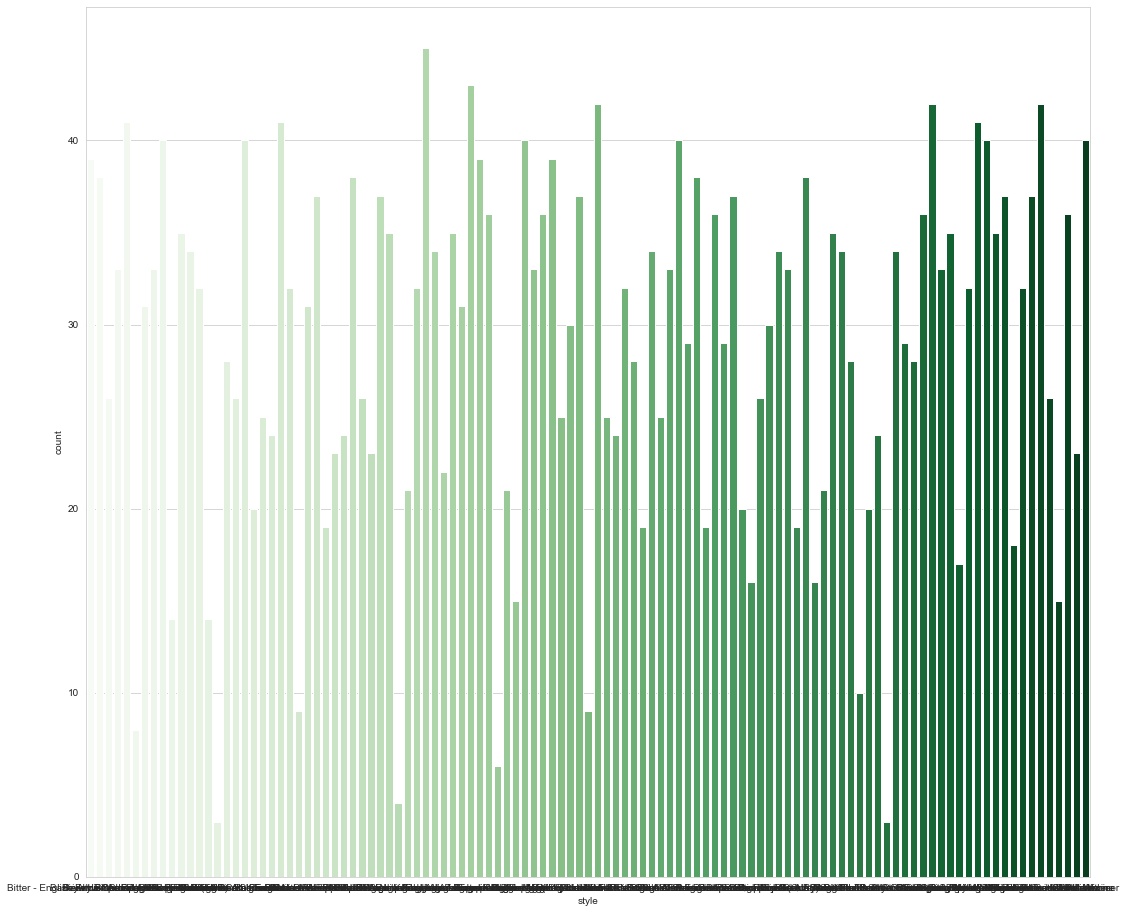

In [33]:
fig_dims = (18, 16)
fig, ax = plt.subplots(figsize = fig_dims)
sns.countplot(data['style'], palette = 'Greens')
# not very readable but we can see the variety of counts

**Observations**

Lager seems to be the most frequent `style` in our dataset.

Interestingly, style could be divided in a main style and a substyle column.\
For example, Lager could be the primary style and European Pale the secondary style.\

Then the main style column would group more beers that are not so different (Lager, Brown Ale, Bitter). \
The substyle column would also group beers that share another attribute (English, American, Fruit)

This would also give us less unique values and therefore reduce the dimensionality when encoding the categorical variables.

###### Exploring `description`

In [34]:
print(data.shape[0])
len(categoricals['description'].unique())

3197


1841

It looks like not all the descriptions are unique.
They are unusable as is for machine learning but we could still leverage the information contained in `description` with NLP.

## Building machine learning models predicting the alcohol content and beer rating

In [35]:
### Useful functions - preparing the data for modeling

# Log Transform
def log_transfom_x(x):
    if np.isfinite(x) and x!=0:
        return np.log(x)
    else:
        return np.nan

def log_transform_df(df, a, b):
    # initialize plot counter
    c = 1 
    fig = plt.figure(figsize = (16, 14))
    
    numerical = df.select_dtypes(np.number)
    columns = numerical.columns
    
    for column in columns:
        df[column] = list(map(log_transfom_x, df[column]))
        
    for column in columns:
        df[column] = df[column].fillna(np.mean(df[column]))
        
        plt.subplot(a, b, c)
        plt.title('{}'.format(column, a, b, c))
        plt.xlabel(column)
        sns.distplot(df[column], fit=norm)
        c = c + 1
        
    plt.tight_layout()
    plt.show()
    
    return df

# Square root transform
def sqrt_transfom_x(x):
    if np.isfinite(x) and x>=0:
        return np.sqrt(x)
    else:
        return np.nan
    
def sqrt_transform_df(df, a, b):
    # initialize plot counter
    c = 1 
    fig = plt.figure(figsize = (16, 14))
    
    numerical = df.select_dtypes(np.number)
    columns = numerical.columns
    
    for column in columns:
        df[column] = list(map(sqrt_transfom_x, df[column]))
        
    for column in columns:
        df[column] = df[column].fillna(np.mean(df[column]))
        
        plt.subplot(a, b, c)
        plt.title('{}'.format(column, a, b, c))
        plt.xlabel(column)
        sns.distplot(df[column], fit=norm)
        c = c + 1
        
    plt.tight_layout()
    plt.show()
    
    return df

# I will use this function to scale the data with StandardScaler
def standard_scaling(df):
    transformer = StandardScaler().fit(df)
    x_standardized = transformer.transform(df)
    X = pd.DataFrame(x_standardized)
    X.columns = df.columns
    return X

# Function to remove the outliers 
def remove_outliers(df):
    numerical = df.select_dtypes(np.number)
    columns = numerical.columns
    for column in columns:
        upper = np.percentile(df[column], 0.95)
        lower = np.percentile(df[column], 0.05)
        iqr = upper - lower
        upper_limit = upper + 1.5 * iqr
        lower_limit = lower - 1.5 * iqr
        df = df[(df[column]>lower_limit) & (df[column]<upper_limit)]
    return df

# Encoding the categoricals
def encode_cat(df):
    encoder = OneHotEncoder(drop='first').fit(df)
    column_names = encoder.get_feature_names(list(df.columns))
    encoded_categorical = encoder.transform(df).toarray()
    encoded_categorical = pd.DataFrame(encoded_categorical, columns=column_names)
    return encoded_categorical

In [36]:
#### Useful functions - modeling and model evaluation

# general modeling function
def modeling(df, target, log, a, b, models=[], test_size=0.3):
    
    # scaling the numerical data
    X_scaled = standard_scaling(df.select_dtypes(np.number))

    # selecting the useable categorical data
    cat = df[['style']]
    cat_encoded = pd.get_dummies(cat, columns=cat.columns, drop_first=True)


    cat_encoded.reset_index(drop=True, inplace=True)
    X_scaled.reset_index(drop=True, inplace=True)

    X = pd.concat([X_scaled, cat_encoded], axis=1)
    X = X.drop(target, axis=1)
    y = df[target]
    
    # initialize plot counter
    c = 1 
    fig = plt.figure(figsize = (16, 14))
    
    for model in models:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
        model.fit(X_train, y_train )
        predictions = model.predict(X_test)
        
        r2 = r2_score(y_test, predictions)
        r2_adj = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
        RMSE = mean_squared_error(y_test, predictions, squared=False)
        MSE = mean_squared_error(y_test, predictions)
        MAE = mean_absolute_error(y_test, predictions)
        print(model, 'metrics are: '), print("R2 =", round(r2,2)), print("R2 adjusted =", round(r2_adj,2)), print("RMSE =", round(RMSE,2)), print("MSE =", round(MSE,2)), print("MAE =", round(MAE,2))
        print()
        
        results = pd.DataFrame()
        if log == 'yes':
            results['true'] = np.exp(y_test)
            results['pred'] = np.exp(predictions)
        else:
            results['true'] = y_test
            results['pred'] = predictions
        results['diff'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
        print('Predictions vs. Real Values - best predictions:')
        print(results.sort_values('diff', ascending=True).head(10))
        print()
        print('Predictions vs. Real Values - worst predictions:')
        print(results.sort_values('diff', ascending=False).head(10))
        print()
        
        plt.subplot(a, b, c)
        plt.title('{}'.format(f'{model}: R2 = {round(r2,2)}', a, b, c))
        plt.xlabel('true')
        plt.ylabel('pred')
        sns.regplot(x=results['true'], y=results['pred'])
        c = c + 1
        print()
    
    plt.tight_layout()
    plt.show()
        
    return predictions


# Modeling function - hyperparameter tuning
def modeling_(X, y, log, a, b, models=[], test_size=0.3):
    
    # initialize plot counter
    c = 1 
    fig = plt.figure(figsize = (16, 14))
    
    for model in models:
        model.fit(X_train, y_train )
        predictions = model.predict(X_test)
        
        r2 = r2_score(y_test, predictions)
        r2_adj = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
        RMSE = mean_squared_error(y_test, predictions, squared=False)
        MSE = mean_squared_error(y_test, predictions)
        MAE = mean_absolute_error(y_test, predictions)
        print(model, 'metrics are: '), print("R2 =", round(r2,2)), print("R2 adjusted =", round(r2_adj,2)), print("RMSE =", round(RMSE,2)), print("MSE =", round(MSE,2)), print("MAE =", round(MAE,2))
        print()
        
        results = pd.DataFrame()
        if log == 'yes':
            results['true'] = np.exp(y_test)
            results['pred'] = np.exp(predictions)
        else:
            results['true'] = y_test
            results['pred'] = predictions
        results['diff'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
        print('Predictions vs. Real Values - best predictions:')
        print(results.sort_values('diff', ascending=True).head(10))
        print()
        print('Predictions vs. Real Values - worst predictions:')
        print(results.sort_values('diff', ascending=False).head(10))
        print()
        
        plt.subplot(a, b, c)
        plt.title('{}'.format(f'{model}: R2 = {round(r2,2)}', a, b, c))
        plt.xlabel('true')
        plt.ylabel('pred')
        sns.regplot(x=results['true'], y=results['pred'])
        c = c + 1
        print()
    
    plt.tight_layout()
    plt.show()
        
    return predictions


# function to find the optimal k value
def optimal_k(df, target, k_min, k_max):
    
    # scaling the numerical data
    X_scaled = standard_scaling(df.select_dtypes(np.number))

    # selecting the useable categorical data
    cat = df[['style']]
    cat_encoded = pd.get_dummies(cat, columns=cat.columns, drop_first=True)


    cat_encoded.reset_index(drop=True, inplace=True)
    X_scaled.reset_index(drop=True, inplace=True)

    X = pd.concat([X_scaled, cat_encoded], axis=1)
    X = X.drop(target, axis=1)
    y = df[target]
    
    scores = []
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    for i in range(k_min,k_max): 
        model = KNeighborsRegressor(n_neighbors=i)
        model.fit(X_train, y_train)
        scores.append(model.score(X_test, y_test))
        
    plt.figure(figsize=(10,6))
    plt.plot(range(k_min, k_max), scores, color = 'blue', linestyle='dashed',
    marker='o', markerfacecolor='red', markersize=10)
    plt.title('R2 vs. K Value')
    plt.xlabel('K')
    plt.ylabel('R2')
    


#### Creating a dataframe for each model

In [37]:
# dataframe for abv
df1 = data.copy()
target1 = data[['abv']]

# dataframe for review_overall
df2 = data.copy()
df2 = df2.drop(['review_aroma', 'review_appearance', 'review_palate', 'review_taste'], axis=1)
target2 = data[['review_overall']]

### Predicting `abv`
#### Creating a benchmark model

LinearRegression() metrics are: 
R2 = 0.57
R2 adjusted = 0.5
RMSE = 1.85
MSE = 3.41
MAE = 0.81

Predictions vs. Real Values - best predictions:
      true      pred      diff
2982   5.1  5.100378  0.000378
1951   5.0  4.999613  0.000387
314    6.1  6.098389  0.001611
3004   5.5  5.498383  0.001617
1703   0.4  0.397972  0.002028
1736   4.0  3.996612  0.003388
3033   4.9  4.903684  0.003684
2183  10.0  9.995606  0.004394
1867   5.2  5.195246  0.004754
3002   5.0  5.006934  0.006934

Predictions vs. Real Values - worst predictions:
      true       pred       diff
299   57.5  12.100627  45.399373
468    0.0   8.023941   8.023941
927   18.0  11.321080   6.678920
2153  16.3  10.435718   5.864282
472    0.0   5.357023   5.357023
1094   0.0   5.320573   5.320573
1567   0.0   4.845455   4.845455
2505  19.5  14.753026   4.746974
2500  18.0  13.674034   4.325966
1593   2.5   6.592056   4.092056




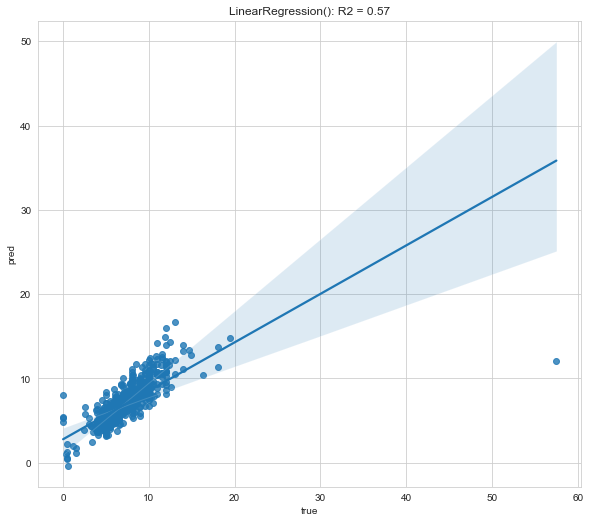

In [38]:
prediction_lr_beta1 = modeling(df1, 'abv', 'no', 2, 2, models=[LinearRegression()], test_size=0.3)

## Feature Engineering and Feature Selection

### Numerical data

**Observations**

The benchmark model performs very poorly.\
We can also see the presence of an outlier that has a real `abv` value of `57.5`. It could be an unusually strong beer or a typo.\
Let's have a look at this beer.

In [39]:
df1[df1['abv'] == 57.5]

name           style       brewery  \
299  Schorschbock 57%  Bock - Eisbock  Schorschbräu   

                  beer_name_(full) description   abv  min_ibu  max_ibu  \
299  Schorschbräu Schorschbock 57%      Notes:  57.5       25       35   

     astringency  body  alcohol  bitter  sweet  sour  salty  fruits  hoppy  \
299            0     7       17       3      9     6      0      10      0   

     spices  malty  review_aroma  review_appearance  review_palate  \
299       2      4           4.0                4.0            4.0   

     review_taste  review_overall  number_of_reviews  
299           3.5             4.0                  1

A quick search shows that this is the beer's actual `abv` value. It's still not helping our model to learn with this 1 outlier so let's drop this row and see how the model performs after.

LinearRegression() metrics are: 
R2 = 0.78
R2 adjusted = 0.74
RMSE = 1.06
MSE = 1.13
MAE = 0.75

Predictions vs. Real Values - best predictions:
      true       pred      diff
109    5.5   5.497888  0.002112
135    6.5   6.502142  0.002142
355    6.0   5.995473  0.004527
606    8.0   8.005352  0.005352
1711   0.5   0.493702  0.006298
818    7.5   7.507460  0.007460
3033   4.9   4.892049  0.007951
1234  10.0  10.008779  0.008779
1129   5.0   4.991207  0.008793
1193   5.0   4.990114  0.009886

Predictions vs. Real Values - worst predictions:
       true       pred      diff
927   18.00  11.472493  6.527507
1094   0.00   5.323776  5.323776
472    0.00   4.722087  4.722087
289   12.00  16.252661  4.252661
2695  15.00  10.818076  4.181924
291   13.00  17.117851  4.117851
1415  12.20   8.219399  3.980601
3097  12.00   8.020226  3.979774
2500  18.00  14.032884  3.967116
719    2.25   6.131425  3.881425




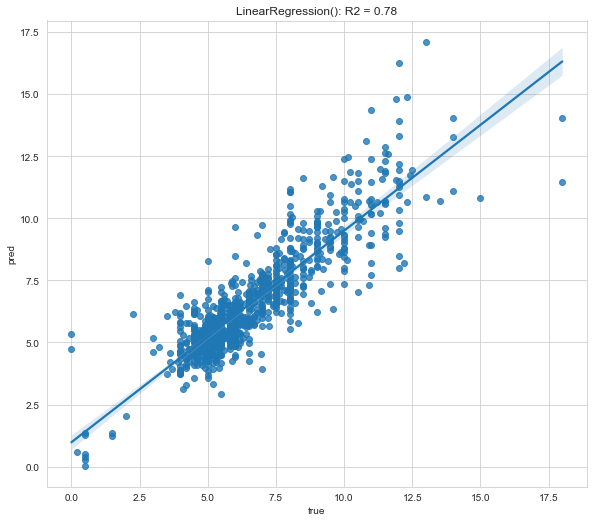

In [40]:
# dropping the outlier
df1 = df1.drop(299)

# checking the model's performance
check_pred = modeling(df1, 'abv', 'no', 2, 2, models=[LinearRegression()], test_size=0.3)

The model predicts that a beer with an actual alcohol level of 18% has 11.47% of `abv`. Let's look at the beers with 18% `abv` and see if the beer with index *927* is much different from the others. The beer with index *2500* has is also in the top ten of the worst predictions table.

In [41]:
df1[df1['abv'] == 18]

name                      style                    brewery  \
294    Double Ice Bock             Bock - Eisbock  Southampton Publick House   
715               Fort       Fruit and Field Beer       Dogfish Head Brewery   
927     120 Minute IPA             IPA - Imperial       Dogfish Head Brewery   
2500  World Wide Stout  Stout - American Imperial       Dogfish Head Brewery   

                               beer_name_(full)  \
294   Southampton Publick House Double Ice Bock   
715                   Dogfish Head Brewery Fort   
927         Dogfish Head Brewery 120 Minute IPA   
2500      Dogfish Head Brewery World Wide Stout   

                                            description   abv  min_ibu  \
294   Notes:Southampton Double Ice Bock is based off...  18.0       25   
715   Notes:An ale brewed with a ridiculous amount o...  18.0        5   
927   Notes:Too extreme to be called beer? 120 Minut...  18.0       65   
2500  Notes:Brewed with a ridiculous amount of barle...  18.0       50   

      max_ibu  astringency  body  alcohol  bitter  sweet  sour  salty  fruits  \
294        35           15    59       79      15    171    49      0      77   
715        45           10    27       74       9    139    41      0      89   
927       100            9    43       50      55     89    42      3      58   
2500       80            7    76       71      67    102    26      0      56   

      hoppy  spices  malty  review_aroma  review_appearance  review_palate  \
294      13      10    119      4.022727           3.954545       4.204545   
715       7       5     21      3.817021           3.805319       3.594681   
927      63      18     60      4.002006           4.029799       3.893410   
2500     22      20    129      4.112301           4.111610       4.125777   

      review_taste  review_overall  number_of_reviews  
294       4.181818        4.136364                 22  
715       3.615957        3.306383                470  
927       3.919484        3.549857               1745  
2500      4.183483        3.774015               1447

*927*: has a much lower level of `alcohol` and a `sweet`, which are two variables highly correlated with the target and therefore inportant to predict `abv`.
*2500*: has also a lower level of `sweet` compared to the other the other two.

*472* and *1094* each have 0% of alcohol yet the model predict they each have respectively 4.7% and 5.3% `abv`.\
Let's look at the beers with 0% alcohol and the values of the variables the most correlated with the target.

In [42]:
df1[df1['abv'] == 0]

name  \
468                    Black Jack (Bourbon Barrel Aged)   
472               North By Northwest Okanogan Black Ale   
1087                               Hudepohl Amber Lager   
1094                                         Mojave Red   
1567  Wild Hop Organic Amber LagerGreen Valley Brewi...   
1759                                        Spring Mild   
1760                                     Jacob Mac Mild   
2936                                        Ruddy Wheat   
2939                                       Winter Wheat   
3013                         Steingadener Weisse Dunkel   
3072                           Franconia Kristal-weizen   
3076                                     Krystal Weizen   

                             style  \
468       Brown Ale - Belgian Dark   
472       Brown Ale - Belgian Dark   
1087  Lager - American Amber / Red   
1094  Lager - American Amber / Red   
1567                Lager - Vienna   
1759       Mild Ale - English Pale   
1760       Mild Ale - English Pale   
2936    Wheat Beer - American Dark   
2939    Wheat Beer - American Dark   
3013     Wheat Beer - Dunkelweizen   
3072   Wheat Beer - Kristallweizen   
3076   Wheat Beer - Kristallweizen   

                                           brewery  \
468        North by Northwest Restaurant & Brewery   
472        North by Northwest Restaurant & Brewery   
1087               Hudepohl-Schoenling Brewing Co.   
1094                  Indian Wells Brewing Company   
1567  Green Valley Brewing Company (Crooked Creek)   
1759                                  The Ship Inn   
1760                          Dostal Alley Brewpub   
2936       Weston Brewing Company & O'Malley's Pub   
2939                     Franconia Brewing Company   
3013                 Aktien-Brauerei Kaufbeuren AG   
3072                     Franconia Brewing Company   
3076                       Portneuf Valley Brewing   

                                       beer_name_(full)  \
468   North by Northwest Restaurant & Brewery Black ...   
472   North by Northwest Restaurant & Brewery North ...   
1087        Hudepohl-Schoenling Brewing Co. Amber Lager   
1094            Indian Wells Brewing Company Mojave Red   
1567  Green Valley Brewing Company (Crooked Creek) W...   
1759                           The Ship Inn Spring Mild   
1760                Dostal Alley Brewpub Jacob Mac Mild   
2936  Weston Brewing Company & O'Malley's Pub Ruddy ...   
2939             Franconia Brewing Company Winter Wheat   
3013  Aktien-Brauerei Kaufbeuren AG Steingadener Wei...   
3072  Franconia Brewing Company Franconia Kristal-we...   
3076             Portneuf Valley Brewing Krystal Weizen   

                                            description  abv  min_ibu  \
468                                              Notes:  0.0       15   
472                                              Notes:  0.0       15   
1087                                             Notes:  0.0       18   
1094  Notes:A smooth red lager without the bite. We ...  0.0       18   
1567                                             Notes:  0.0       15   
1759                                             Notes:  0.0       15   
1760                                             Notes:  0.0       15   
2936                                             Notes:  0.0       10   
2939                                             Notes:  0.0       10   
3013                                             Notes:  0.0       10   
3072                                             Notes:  0.0       10   
3076  Notes:Cousin to the hefeweizen, we've cleared ...  0.0       10   

      max_ibu  astringency  body  alcohol  bitter  sweet  sour  salty  fruits  \
468        25            6    37       46       6     49    11      0      20   
472        25            3    22        3      14     18     4      0       4   
1087       30            8    26        9      20     47    13      2      10   
1094       30            8    38        9  

In [43]:
df1[df1['abv'] == 0]['alcohol'].sort_values(ascending=False)

468     46
1087     9
1094     9
3013     9
1567     8
2939     4
472      3
2936     3
3072     3
1759     1
1760     1
3076     0
Name: alcohol, dtype: int64

In [44]:
df1[df1['abv'] == 0]['sweet'].sort_values(ascending=False)

1094    74
3013    58
468     49
1087    47
1567    34
2939    22
472     18
2936    10
1759     7
1760     3
3076     2
3072     1
Name: sweet, dtype: int64

In [45]:
df1[df1['abv'] == 0]['review_aroma'].sort_values(ascending=False)

468     3.966667
3072    3.750000
1759    3.666667
2939    3.500000
472     3.388889
1087    3.350000
3013    3.350000
1567    3.014493
3076    3.000000
2936    2.875000
1094    2.827586
1760    2.666667
Name: review_aroma, dtype: float64

*1094*: ranks very high in both `alcohol` and `sweet`.\
*472*: it's harder to tell for this beer, althoug it is one of the only Brown Ale - Belgian Dark to have 0%.\
Surprisingly, *468* is not in the top 10 or even top 30 of the beers whose `abv` is predicted with the least level of accuracy by the model while clearly being an outlier among the beers with 0% of alcohol (Brown Ale, `abv` of 46).

LinearRegression() metrics are: 
R2 = 0.79
R2 adjusted = 0.75
RMSE = 1.05
MSE = 1.11
MAE = 0.75

Predictions vs. Real Values - best predictions:
      true      pred      diff
2577   5.0  4.999829  0.000171
563    5.0  5.001816  0.001816
355    6.0  5.997947  0.002053
1459   5.1  5.103047  0.003047
314    6.1  6.103226  0.003226
1951   5.0  4.995159  0.004841
0      5.3  5.294921  0.005079
1882   4.9  4.906369  0.006369
570    5.0  5.009013  0.009013
109    5.5  5.490201  0.009799

Predictions vs. Real Values - worst predictions:
      true       pred      diff
1087   0.0   5.188476  5.188476
2772  20.0  15.032768  4.967232
2695  15.0  10.718884  4.281116
289   12.0  16.180785  4.180785
1415  12.2   8.073666  4.126334
291   13.0  16.917708  3.917708
2936   0.0   3.886674  3.886674
3097  12.0   8.121537  3.878463
1774  13.5   9.680431  3.819569
2017  12.0   8.496460  3.503540




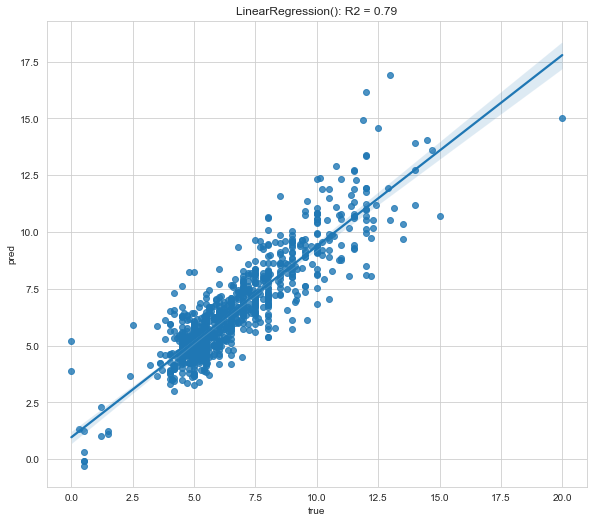

In [46]:
# Dropping the outlier
df1 = df1.drop(472)
df1 = df1.drop(927)
df1 = df1.drop(1094)

check_pred = modeling(df1, 'abv', 'no', 2, 2, models=[LinearRegression()], test_size=0.3)

### Improving the distributions and dealing with outliers
###### Can we improve the model's performance by improving the distribution shapes with log_transform or sqrt_transform?
This might also take care of some of the outliers.

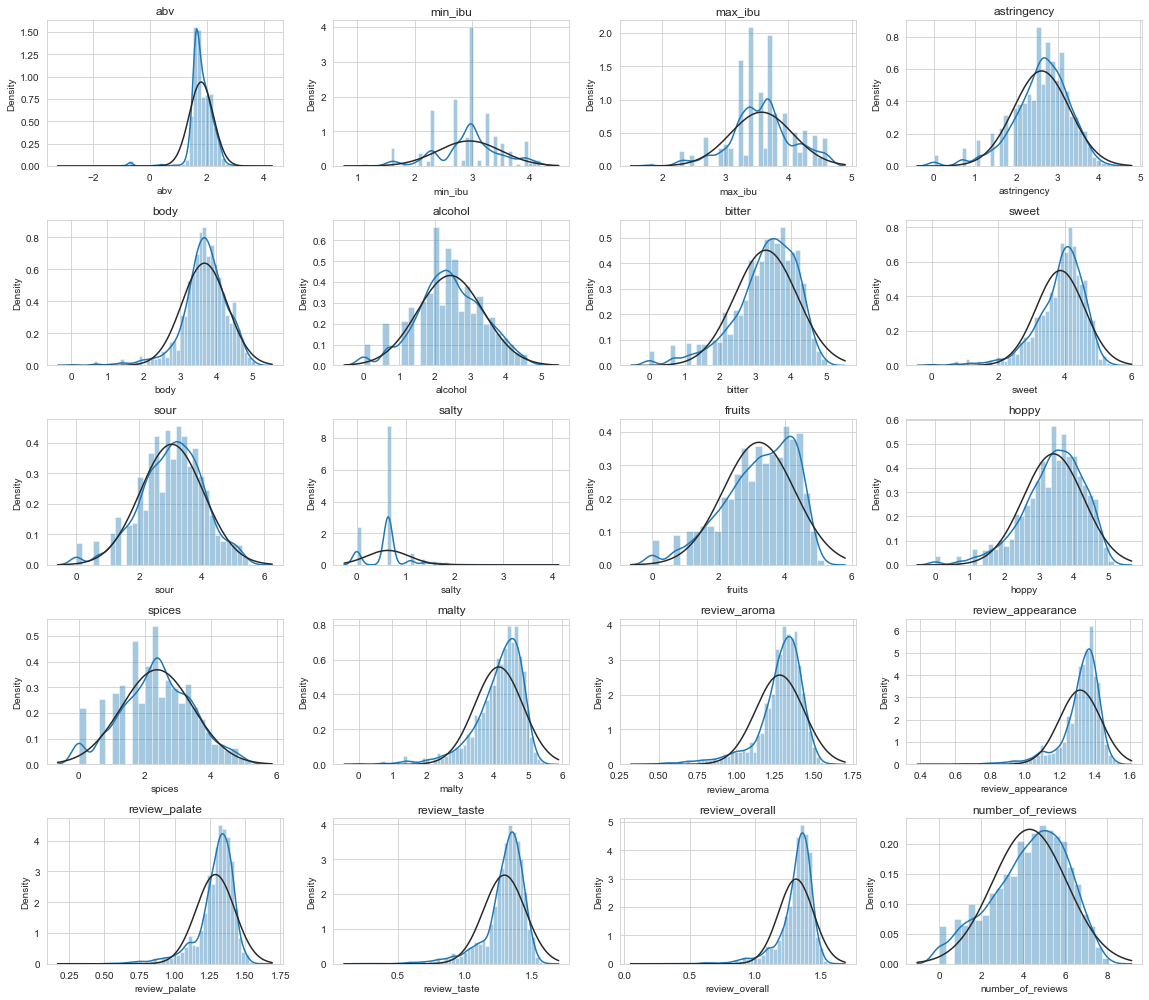

In [47]:
# Log transform
copy = data.copy()
df1_log = log_transform_df(copy, 5, 4)

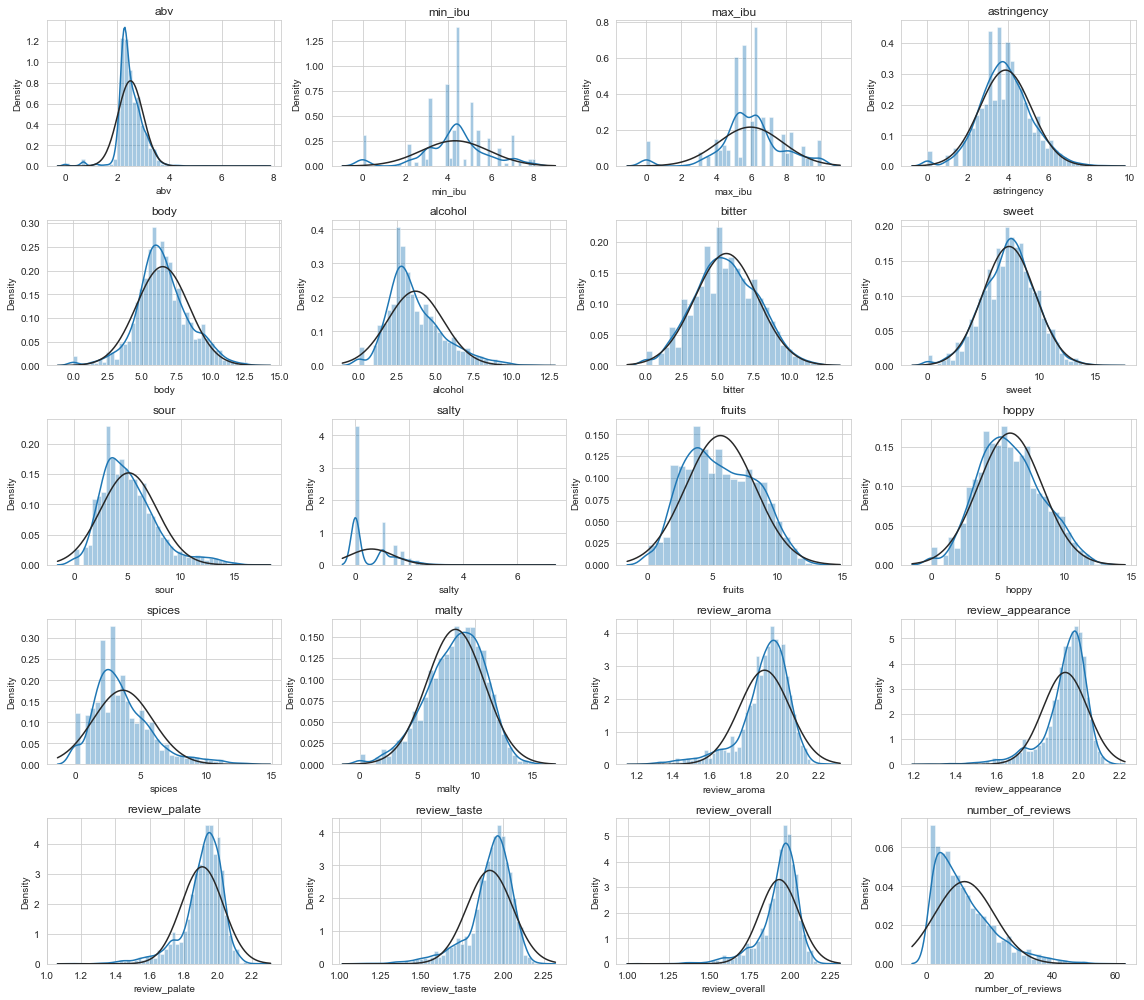

In [48]:
# Square-root transform
copy2 = data.copy()
df1_sqrt = sqrt_transform_df(copy2, 5, 4)
# doesn't fit the data as well as the log transformation

LinearRegression() metrics are: 
R2 = 0.81
R2 adjusted = 0.78
RMSE = 0.16
MSE = 0.03
MAE = 0.11

Predictions vs. Real Values - best predictions:
      true      pred      diff
1124   5.2  5.199721  0.000279
2299   5.2  5.199178  0.000822
1064   4.5  4.498568  0.001432
479    5.8  5.798324  0.001676
1710   0.5  0.497560  0.002440
1071   5.2  5.203600  0.003600
170    3.7  3.703773  0.003773
2567   5.5  5.504688  0.004688
1025   5.0  4.994783  0.005217
166    4.3  4.293157  0.006843

Predictions vs. Real Values - worst predictions:
      true       pred       diff
299   57.5  10.549001  46.950999
2153  16.3   8.737456   7.562544
927   18.0  10.659156   7.340844
2505  19.5  13.888786   5.611214
2500  18.0  12.516904   5.483096
3097  12.0   7.537857   4.462143
298   11.9  15.981692   4.081692
422   12.0   8.356739   3.643261
2771   7.0  10.564823   3.564823
3115   9.0   5.477593   3.522407




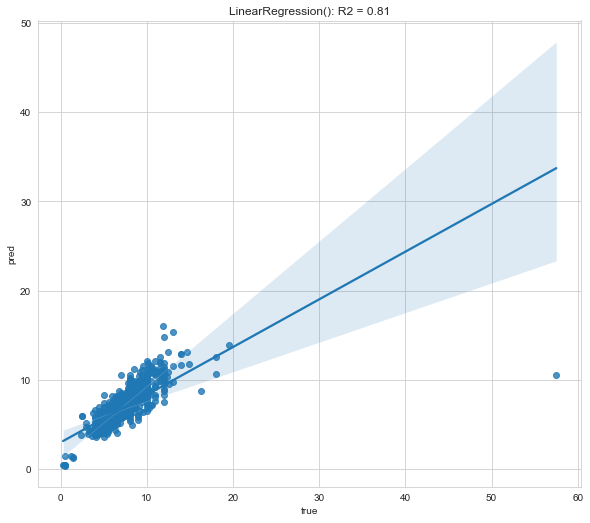

In [49]:
# checking the performance
check_log = modeling(df1_log, 'abv', 'yes', 2, 2, models=[LinearRegression()], test_size=0.3)

Let's look at the top 5 biggest difference. We already looked at *299*, *927* and *2500*.

*2153* has an actual `abv` value of 16.3 and the model predicts 8.73%.\
Looking at the difference with the other 16.3% beer, it looks like it might be due to a lower range of min_ibu and max_ibu values.

In [50]:
df1[df1['abv'] == 16.3]

name                  style                brewery  \
2153        Rumpkin           Pumpkin Beer  Avery Brewing Company   
2747  Mélange No. 3  Strong Ale - American             The Bruery   

                   beer_name_(full)  \
2153  Avery Brewing Company Rumpkin   
2747       The Bruery Melange No. 3   

                                            description   abv  min_ibu  \
2153  Notes:We wondered what would happen if a monst...  16.3        5   
2747  Notes:A blend of Black Tuesday, anniversary al...  16.3       40   

      max_ibu  astringency  body  alcohol  bitter  sweet  sour  salty  fruits  \
2153       70            7    40       78      13     83    11      0      72   
2747      100            6    60       61      18     99    23      0      57   

      hoppy  spices  malty  review_aroma  review_appearance  review_palate  \
2153      5      79     53      3.962766           3.718085       3.835106   
2747     10      21    114      4.422727           4.063636       4.295455   

      review_taste  review_overall  number_of_reviews  
2153      3.957447        3.803191                 94  
2747      4.422727        4.090909                110

*2505* has an actual `abv` value of 19.5 and the model predicts 13.88%.\
It's hard to tell why for this one so I will not drop it.

In [51]:
df1[(df1['abv'] > 17) & (df1['abv'] < 22)] # there is only one beer with 19.5% alcohol

name                      style                    brewery  \
294    Double Ice Bock             Bock - Eisbock  Southampton Publick House   
715               Fort       Fruit and Field Beer       Dogfish Head Brewery   
2500  World Wide Stout  Stout - American Imperial       Dogfish Head Brewery   
2505     Black Tuesday  Stout - American Imperial                 The Bruery   
2513    Chocolate Rain  Stout - American Imperial                 The Bruery   
2772          Colossus      Strong Ale - American     DuClaw Brewing Company   

                               beer_name_(full)  \
294   Southampton Publick House Double Ice Bock   
715                   Dogfish Head Brewery Fort   
2500      Dogfish Head Brewery World Wide Stout   
2505                   The Bruery Black Tuesday   
2513                  The Bruery Chocolate Rain   
2772            DuClaw Brewing Company Colossus   

                                            description   abv  min_ibu  \
294   Notes:Southampton Double Ice Bock is based off...  18.0       25   
715   Notes:An ale brewed with a ridiculous amount o...  18.0        5   
2500  Notes:Brewed with a ridiculous amount of barle...  18.0       50   
2505  Notes:Our infamous Black Tuesday is an imperia...  19.5       50   
2513  Notes:Black Tuesday with Vanilla Bean & Cocoa ...  19.6       50   
2772  Notes:Brewed to push the limits of our own ski...  20.0       40   

      max_ibu  astringency  body  alcohol  bitter  sweet  sour  salty  fruits  \
294        35           15    59       79      15    171    49      0      77   
715        45           10    27       74       9    139    41      0      89   
2500       80            7    76       71      67    102    26      0      56   
2505       80            3    70       95      25    106    17      1      43   
2513       80            6    82       51      27     69     7      0      14   
2772      100           11    59      106      23    151    61      1      90   

      hoppy  spices  malty  review_aroma  review_appearance  review_palate  \
294      13      10    119      4.022727           3.954545       4.204545   
715       7       5     21      3.817021           3.805319       3.594681   
2500     22      20    129      4.112301           4.111610       4.125777   
2505      3      30    126      4.477690           4.301837       4.400262   
2513      5      25     88      4.481132           4.080189       4.113208   
2772     16      56     69      3.858974           3.846154       3.948718   

      review_taste  review_overall  number_of_reviews  
294       4.181818        4.136364                 22  
715       3.615957        3.306383                470  
2500      4.183483        3.774015               1447  
2505      4.510499        4.209974                381  
2513      4.396226        4.235849                106  
2772      4.038462        3.756410                 39

LinearRegression() metrics are: 
R2 = 0.85
R2 adjusted = 0.82
RMSE = 0.15
MSE = 0.02
MAE = 0.11

Predictions vs. Real Values - best predictions:
      true      pred      diff
2848   8.0  7.999831  0.000169
2080   5.7  5.700531  0.000531
1696   0.4  0.400655  0.000655
2011   6.6  6.602960  0.002960
1019   4.6  4.603110  0.003110
3000   5.3  5.305472  0.005472
1076   4.9  4.907657  0.007657
818    7.5  7.507923  0.007923
1686   0.4  0.392066  0.007934
1811   5.0  5.009208  0.009208

Predictions vs. Real Values - worst predictions:
       true       pred      diff
2772  20.00  12.099871  7.900129
1415  12.20   7.955282  4.244718
3097  12.00   7.757536  4.242464
298   11.90  15.924525  4.024525
2844  12.90   8.951543  3.948457
2695  15.00  11.141516  3.858484
2317  12.00   8.269359  3.730641
719    2.25   5.905166  3.655166
1236  12.00   8.352742  3.647258
2444  10.90   7.284092  3.615908




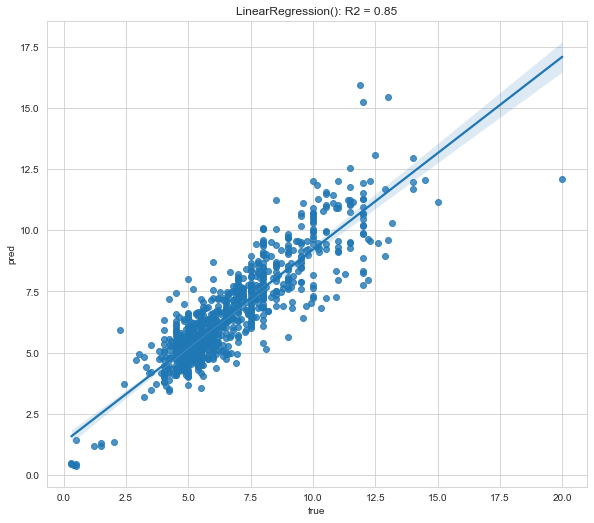

In [52]:
# dropping the outlier
df1_log = df1_log.drop(299)
df1_log = df1_log.drop(2153)
df1_log = df1_log.drop(927)
df1_log = df1_log.drop(2500)

# checking the model's performance
check_pred = modeling(df1_log, 'abv', 'yes', 2, 2, models=[LinearRegression()], test_size=0.3)

**Observation**

Improving the distributions and removing a few outliers improves the model's performance.

### Testing and optimizing different models

#### Testing the KNeighborsRegressor, RandomForestRegressor, GradientBoostingRegressor

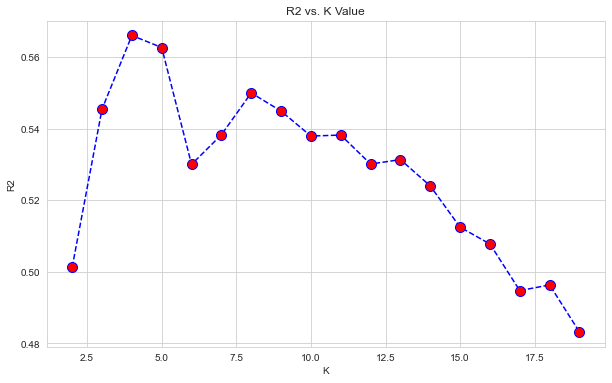

In [53]:
# first let's find the optimal k value for the KNeighborsRegressor
best_k = optimal_k(df1_log, 'abv', 2, 20)

LinearRegression() metrics are: 
R2 = 0.85
R2 adjusted = 0.82
RMSE = 0.15
MSE = 0.02
MAE = 0.11

Predictions vs. Real Values - best predictions:
      true      pred      diff
2848   8.0  7.999831  0.000169
2080   5.7  5.700531  0.000531
1696   0.4  0.400655  0.000655
2011   6.6  6.602960  0.002960
1019   4.6  4.603110  0.003110
3000   5.3  5.305472  0.005472
1076   4.9  4.907657  0.007657
818    7.5  7.507923  0.007923
1686   0.4  0.392066  0.007934
1811   5.0  5.009208  0.009208

Predictions vs. Real Values - worst predictions:
       true       pred      diff
2772  20.00  12.099871  7.900129
1415  12.20   7.955282  4.244718
3097  12.00   7.757536  4.242464
298   11.90  15.924525  4.024525
2844  12.90   8.951543  3.948457
2695  15.00  11.141516  3.858484
2317  12.00   8.269359  3.730641
719    2.25   5.905166  3.655166
1236  12.00   8.352742  3.647258
2444  10.90   7.284092  3.615908


KNeighborsRegressor(n_neighbors=4) metrics are: 
R2 = 0.57
R2 adjusted = 0.5
RMSE = 0.26
MSE = 0.07

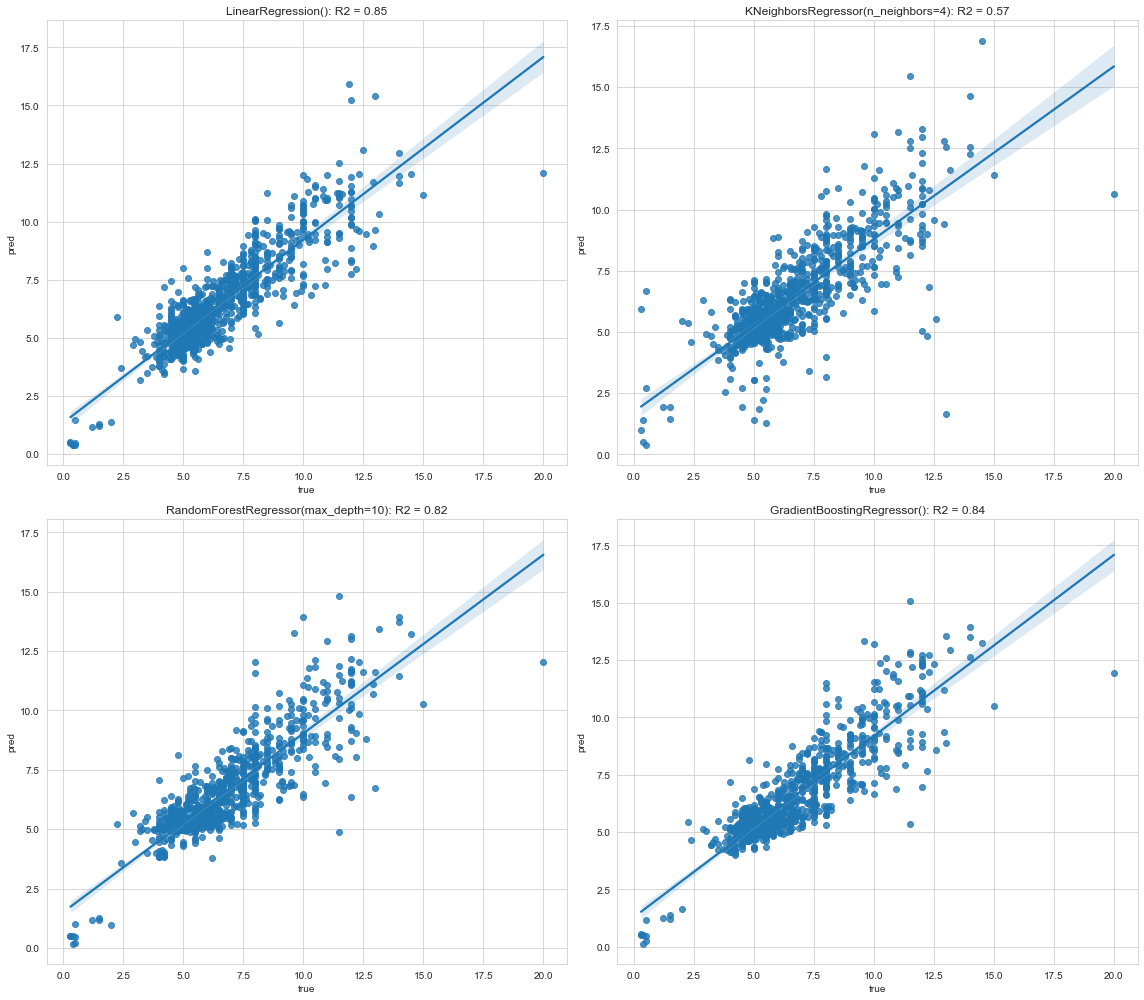

In [54]:
# checking the performance of three other models and compare them to the Linear Regression
check_pred = modeling(df1_log, 'abv', 'yes', 2, 2, models=[LinearRegression(), KNeighborsRegressor(n_neighbors=4), RandomForestRegressor(max_depth=10), GradientBoostingRegressor()], test_size=0.3)

## Hyper-parameter tuning 
With RandomForestRegressor and GradientBoostingRegressor

In [55]:
# scaling the numerical data
X_scaled = standard_scaling(df1_log.select_dtypes(np.number))

# selecting the useable categorical data
cat = df1_log[['style']]
cat_encoded = pd.get_dummies(cat, columns=cat.columns, drop_first=True)

cat_encoded.reset_index(drop=True, inplace=True)
X_scaled.reset_index(drop=True, inplace=True)

X = pd.concat([X_scaled, cat_encoded], axis=1)
X = X.drop('abv', axis=1)
y = df1_log['abv']

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

#### Optimizing the RandomForestRegressor

In [56]:
# Defining the range of hyper-parameters:
rf_hyperparameters = {
    'n_estimators' : [2500, 3000], 
    'max_features' : ['auto', 'sqrt'], 
    'bootstrap': [True],
    'max_depth': [4, 6, 8],
    'min_samples_leaf' : [1, 2, 3]
    } 

# Grid search - RandomForestRegressor
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), rf_hyperparameters, cv=10,
                           scoring='neg_root_mean_squared_error',
                           return_train_score=True, n_jobs=-1)

grid_search_rf.fit(X_train, y_train)
rf_best_parameters = grid_search_rf.best_params_
print(grid_search_rf.best_params_)

{'bootstrap': True, 'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 2500}


RandomForestRegressor(max_depth=8, n_estimators=2500, random_state=42) metrics are: 
R2 = 0.82
R2 adjusted = 0.79
RMSE = 0.17
MSE = 0.03
MAE = 0.12

Predictions vs. Real Values - best predictions:
      true      pred      diff
2937   5.4  5.397947  0.002053
491    5.4  5.403026  0.003026
1066   5.1  5.104108  0.004108
439    5.6  5.593710  0.006290
1025   5.0  5.008198  0.008198
3067   5.1  5.090940  0.009060
218    5.8  5.809130  0.009130
3004   5.5  5.490749  0.009251
1408   8.5  8.509276  0.009276
192    5.0  5.009450  0.009450

Predictions vs. Real Values - worst predictions:
      true       pred      diff
2772  20.0  11.833683  8.166317
296   13.0   6.254702  6.745298
184   11.5   5.133104  6.366896
3097  12.0   6.394580  5.605420
2695  15.0  10.058551  4.941449
2444  10.9   6.646496  4.253504
1415  12.2   7.947332  4.252668
2756  11.5  15.533790  4.033790
1253  12.6   8.660052  3.939948
2091  10.0   6.329923  3.670077




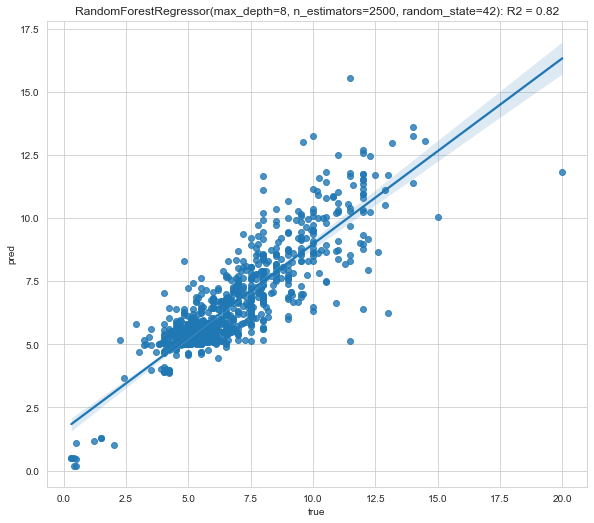

In [57]:
# defnining the optimized model
rf = RandomForestRegressor(n_estimators = 2500, max_features='auto', min_samples_leaf = 1, max_depth=8, bootstrap=True, random_state=42)

# Modeling
predictions_rf = modeling_(X, y, 'yes', 2, 2, models=[rf], test_size=0.30)

Text(0.5, 1.0, 'Top 10 most important features according to the Random Forest Regressor')

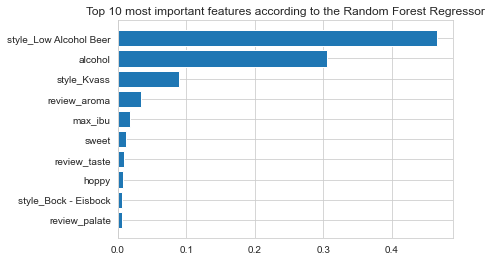

In [58]:
# let's check which features are the most important according to the Random Forest Regressor's feature ranking
features_ranking = pd.DataFrame(rf.feature_importances_, index=X.columns).sort_values(by=0, ascending=True)
features_ranking = features_ranking.rename(columns={0: 'feature_importance'})
fr = features_ranking.tail(10)
plt.barh(fr.index, fr['feature_importance'])
plt.title('Top 10 most important features according to the Random Forest Regressor')

#### Optimizing the GradientBoostingRegressor

In [59]:
# Model
gbr = GradientBoostingRegressor(random_state=42)

gb_hyperparameters = {
    'n_estimators' : [25, 200],
    'learning_rate' : [0.05, 0.1, 0.2],
    'min_samples_split': [2, 4, 5],    
    'max_depth' : [4, 5, 6, 7]}


# Grid search - GradientBoostingRegressor
grid_search_gb = GridSearchCV(gbr, gb_hyperparameters, cv=5,
                           scoring='neg_root_mean_squared_error',
                           return_train_score=True, n_jobs=-1)

# searching for the best parameters
grid_search_gb.fit(X_train, y_train)
gbr_best_parameters = grid_search_gb.best_params_
print(gbr_best_parameters)

{'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 200}


GradientBoostingRegressor(max_depth=5, n_estimators=200, random_state=42) metrics are: 
R2 = 0.85
R2 adjusted = 0.82
RMSE = 0.15
MSE = 0.02
MAE = 0.11

Predictions vs. Real Values - best predictions:
      true       pred      diff
233    6.5   6.501091  0.001091
1767   8.3   8.297721  0.002279
1130   5.0   5.002594  0.002594
1118   5.1   5.096595  0.003405
1990   5.3   5.304438  0.004438
1340   5.6   5.604484  0.004484
257   11.0  10.993753  0.006247
2432   4.5   4.506248  0.006248
808    6.7   6.691469  0.008531
2046   6.0   6.009006  0.009006

Predictions vs. Real Values - worst predictions:
      true       pred      diff
2772  20.0  12.400445  7.599555
2756  11.5  17.952135  6.452135
300   12.0  18.093533  6.093533
184   11.5   5.436059  6.063941
3097  12.0   6.782487  5.217513
88    10.0  13.935282  3.935282
2715   9.6  13.480223  3.880223
2695  15.0  11.329045  3.670955
1415  12.2   8.696597  3.503403
1253  12.6   9.133949  3.466051




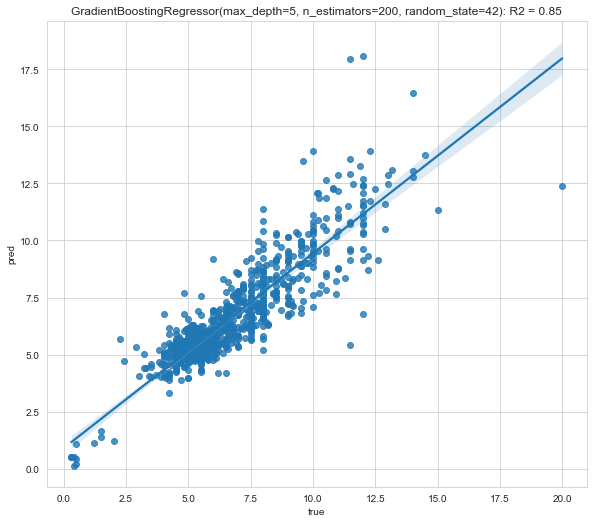

In [60]:
# defnining the optimized model
gbr = GradientBoostingRegressor(n_estimators = 200, max_depth = 5, min_samples_split = 2, learning_rate = 0.1, random_state = 42)

# Modeling
predictions_gbr = modeling_(y, X, 'yes', 2, 2, models=[gbr], test_size = 0.30)

#### Dropping correlated columns and keeping review_aroma as it is the most important feature according to the RandomForestRegressor

In [61]:
X2 = X.drop(['review_appearance', 'review_palate', 'review_taste', 'review_overall'], axis=1)

GradientBoostingRegressor(max_depth=5, n_estimators=200, random_state=42) metrics are: 
R2 = 0.85
R2 adjusted = 0.82
RMSE = 0.15
MSE = 0.02
MAE = 0.11

Predictions vs. Real Values - best predictions:
      true       pred      diff
233    6.5   6.501091  0.001091
1767   8.3   8.297721  0.002279
1130   5.0   5.002594  0.002594
1118   5.1   5.096595  0.003405
1990   5.3   5.304438  0.004438
1340   5.6   5.604484  0.004484
257   11.0  10.993753  0.006247
2432   4.5   4.506248  0.006248
808    6.7   6.691469  0.008531
2046   6.0   6.009006  0.009006

Predictions vs. Real Values - worst predictions:
      true       pred      diff
2772  20.0  12.400445  7.599555
2756  11.5  17.952135  6.452135
300   12.0  18.093533  6.093533
184   11.5   5.436059  6.063941
3097  12.0   6.782487  5.217513
88    10.0  13.935282  3.935282
2715   9.6  13.480223  3.880223
2695  15.0  11.329045  3.670955
1415  12.2   8.696597  3.503403
1253  12.6   9.133949  3.466051




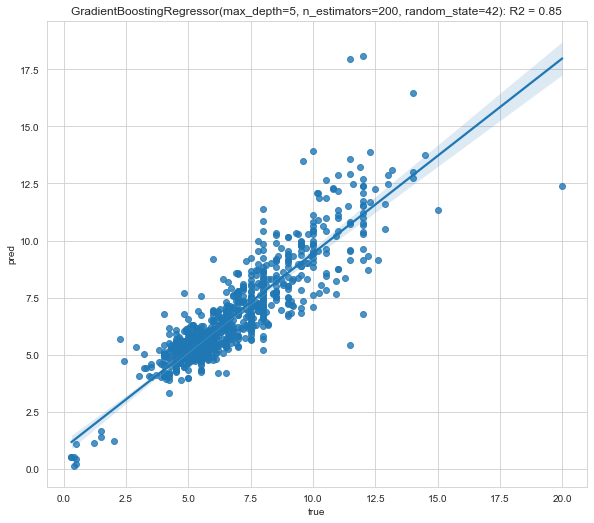

In [62]:
predictions_gbr = modeling_(y, X2, 'yes', 2, 2, models=[gbr], test_size = 0.30)

### Predicting `review_overall` - optional (try once description is done)
#### Creating a benchmark model

LinearRegression() metrics are: 
R2 = 0.44
R2 adjusted = 0.36
RMSE = 0.31
MSE = 0.1
MAE = 0.23

Predictions vs. Real Values - best predictions:
          true      pred          diff
52    3.769366  3.769365  6.893311e-07
2384  3.947826  3.947004  8.216818e-04
3106  3.814815  3.815701  8.855310e-04
3048  3.870536  3.869148  1.387746e-03
1010  3.952055  3.954363  2.307869e-03
2211  4.092360  4.094688  2.328416e-03
2040  3.971014  3.968365  2.649284e-03
2415  3.800000  3.797239  2.760696e-03
2351  3.738889  3.742243  3.353813e-03
2516  4.182453  4.186487  4.034198e-03

Predictions vs. Real Values - worst predictions:
          true      pred      diff
764   4.750000  3.063932  1.686068
772   4.500000  3.018564  1.481436
2595  2.500000  3.956797  1.456797
1237  1.716667  2.868387  1.151720
2422  2.500000  3.607145  1.107145
298   2.750000  3.826509  1.076509
2935  4.500000  3.436518  1.063482
1041  2.000000  3.029869  1.029869
1174  4.516667  3.491228  1.025439
1675  5.000000  4.054438  0

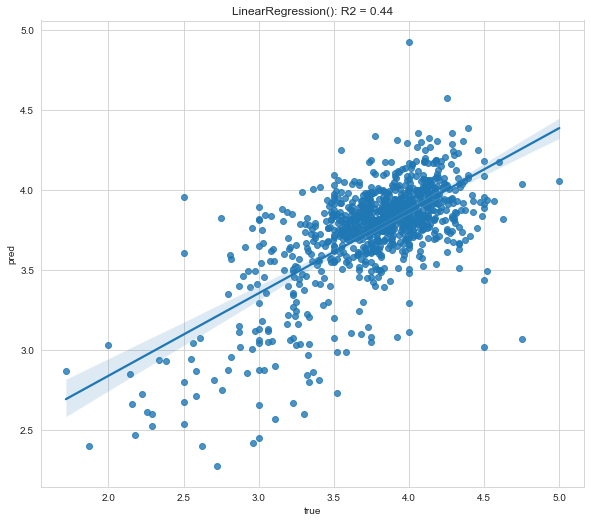

In [63]:
prediction_lr_beta2 = modeling(df2, 'review_overall', 'no', 2, 2, models=[LinearRegression()], test_size=0.3)

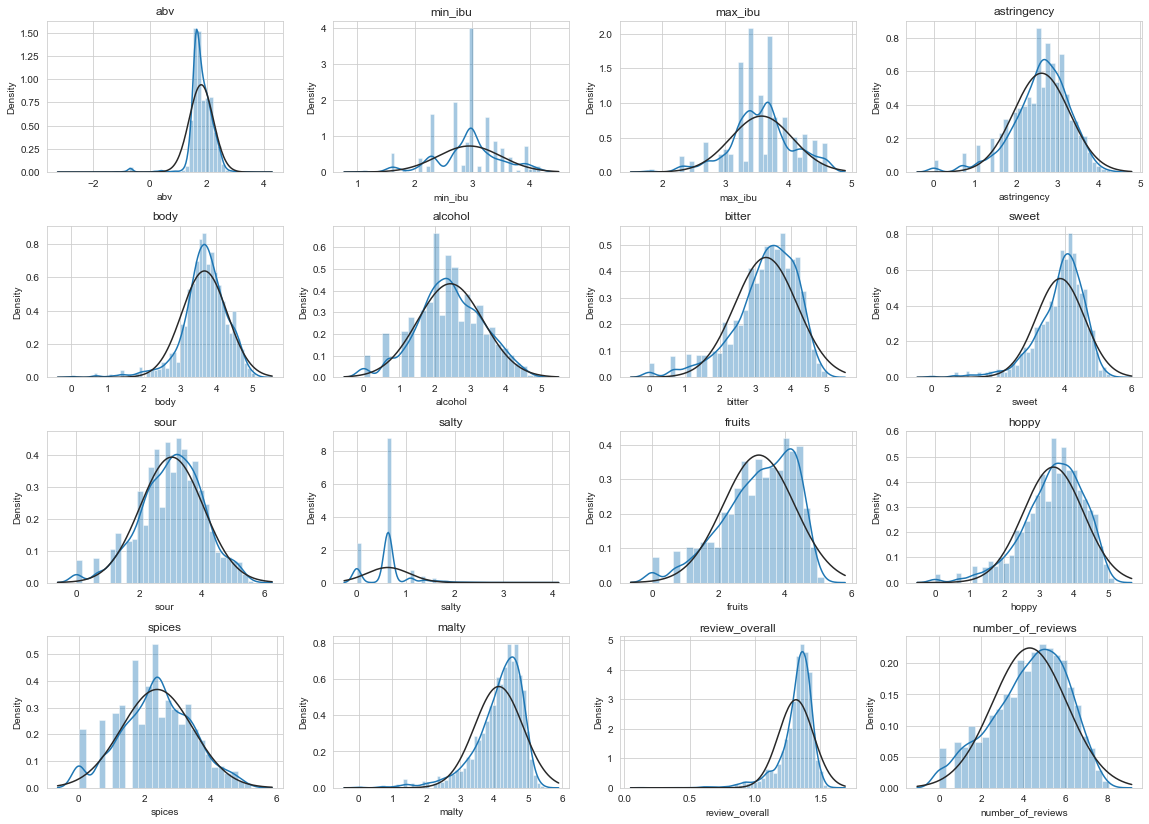

In [64]:
# Log transform
copy_2 = df2.copy()
df2_log = log_transform_df(copy_2, 5, 4)

LinearRegression() metrics are: 
R2 = 0.44
R2 adjusted = 0.36
RMSE = 0.09
MSE = 0.01
MAE = 0.07

Predictions vs. Real Values - best predictions:
          true      pred      diff
573   3.500000  3.499896  0.000104
3166  3.837838  3.836405  0.001433
332   3.785714  3.784005  0.001709
718   3.483908  3.482061  0.001847
3039  3.943396  3.945402  0.002006
166   3.889831  3.887392  0.002439
776   3.561410  3.558777  0.002633
805   4.115562  4.112923  0.002639
1064  3.316718  3.313948  0.002770
2222  3.917910  3.915140  0.002770

Predictions vs. Real Values - worst predictions:
          true      pred      diff
764   4.750000  2.991385  1.758615
772   4.500000  3.036343  1.463657
2595  2.500000  3.900330  1.400330
2422  2.500000  3.767538  1.267538
2935  4.500000  3.343933  1.156067
416   3.000000  4.116231  1.116231
1237  1.716667  2.832640  1.115973
767   3.750000  2.656622  1.093378
761   3.916667  2.845463  1.071204
1174  4.516667  3.495060  1.021607




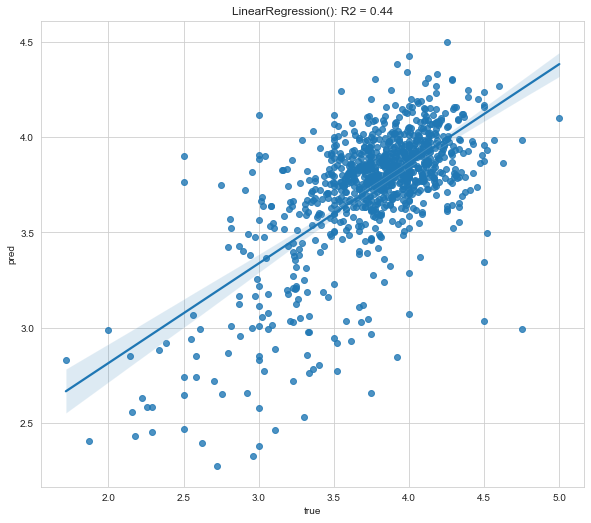

In [65]:
# check model's performance
check_2 = modeling(df2_log, 'review_overall', 'yes', 2, 2, models=[LinearRegression()], test_size=0.3)

In [66]:
# NLP on description

### Exporting the data

**Data for the Beer Recommender**

In [96]:
data.to_csv('C:/Users/camil/Documents/Courses/Ironhack/Module 1/Final Project/Beer Profiles and Ratings Study/data.csv', sep=",",header=True, index=False)

**Data for SQL**

In [102]:
# data for SQL
data_sql = data.copy()

# We remove special characters that can't be reat by UT8-F
col_list = ['name', 'brewery', 'beer_name_(full)', 'description']

for col in col_list:
    data_sql = data_sql[data_sql[col].str.contains ('[^ a-zA-Z0-9]')]

# exporting the data as a CSV file
data_sql.to_csv('C:/Users/camil/Documents/Courses/Ironhack/Module 1/Final Project/Beer Profiles and Ratings Study/data_sql.csv', sep=",",header=True, index=False)    

# checking the shape and looking at the data
print(data_sql.shape)
data_sql.head()

(406, 25)


name                  style  \
18                                  Alt-eration Ale                Altbier   
24                                  Hövels Original                Altbier   
34                                    Füchschen Alt                Altbier   
57  Griffin's BowBoston Beer Company (Samuel Adams)  Barleywine - American   
66                                            # 100  Barleywine - American   

                                      brewery  \
18                               Hops & Grain   
24                        Hövels Hausbrauerei   
34                      Brauerei Im Füchschen   
57         Boston Beer Company (Samuel Adams)   
66  Nøgne Ø - Det Kompromissløse Bryggeri A/S   

                                    beer_name_(full)  \
18                      Hops & Grain Alt-eration Ale   
24    Hövels Hausbrauerei Hövels Original Bitterbier   
34            Brauerei Im Füchschen Im Füchschen Alt   
57  Boston Beer Company (Samuel Adams) Griffin's Bow   
66   Nøgne Ø - Det Kompromissløse Bryggeri A/S # 100   

                                          description   abv  min_ibu  max_ibu  \
18                                             Notes:   5.0       25       50   
24                                             Notes:   5.5       25       50   
34                                             Notes:   4.5       25       50   
57  Notes:From the aroma and notes of sweet honeys...  11.5       60      100   
66  Notes:23,5° P, 80 IBU.First brewed to celebrat...  10.0       60      100   

    astringency  body  alcohol  bitter  sweet  sour  salty  fruits  hoppy  \
18           21    43        3      54     54     7      0      10     60   
24           22    38       10      47     54    10      1      14     68   
34           33    54       13      52     57    10      0      14     68   
57            5    65       41      60    146    78      0     117     71   
66           18    70       43      85     92    26      1      53     95   

    spices  malty  review_aroma  review_appearance  review_palate  \
18       9    111      5.000000           4.000000       4.000000   
24       2    117      3.519231           3.788462       3.711538   
34      15    100      4.095238           4.238095       4.261905   
57      25    104      3.557471           3.833333       3.586207   
66      15    113      4.013761           4.153670       4.084862   

    review_taste  review_overall  number_of_reviews  
18      4.000000        4.500000                  1  
24      3.615385        3.750000                 26  
34      4.214286        4.452381                 21  
57      3.442529        3.465517                 87  
66      4.094037        3.961009                218

**Beer reviews for SQL**

In [101]:
# reading the csv file
beer_reviews_sql = pd.read_csv('beer_reviews.csv')

# removing the NaNs
print(beer_reviews_sql.shape)
beer_reviews_sql.dropna(inplace=True)
print(beer_reviews_sql.shape)

# columns to be cleaned of special characters
col_list_ = ['brewery_name', 'beer_style', 'beer_name']

for col in col_list_:
    beer_reviews_sql = beer_reviews_sql[beer_reviews_sql[col].str.contains ('[^ a-zA-Z0-9]')]
    
# checking the shape    
print(beer_reviews_sql.shape)

# exporting the data as a CSV file
beer_reviews_sql.to_csv('C:/Users/camil/Documents/Courses/Ironhack/Module 1/Final Project/Beer Profiles and Ratings Study/beer_reviews_sql.csv', sep=",",header=True, index=False)

# looking at the data
beer_reviews_sql.head()

(1586614, 13)
(1518478, 13)
(71113, 13)


brewery_id                 brewery_name  review_time  review_overall  \
1497        1386  Harmon Restaurant & Brewery   1222399241             3.0   
2217       14756        Bluegrass Brewing Co.   1289518609             3.5   
2218       14756        Bluegrass Brewing Co.   1271679864             3.0   
2219       14756        Bluegrass Brewing Co.   1269276872             3.0   
2220       14756        Bluegrass Brewing Co.   1269220133             3.0   

      review_aroma  review_appearance review_profilename  \
1497           3.5                2.5      explosivebeer   
2217           3.0                3.5           rapayn01   
2218           2.5                3.0           biker30x   
2219           3.5                3.0         Nicadeamis   
2220           2.5                3.0           Dotcubed   

                               beer_style  review_palate  review_taste  \
1497  Extra Special / Strong Bitter (ESB)            3.0           3.0   
2217       American Double / Imperial IPA            3.5           4.0   
2218       American Double / Imperial IPA            3.0           3.0   
2219       American Double / Imperial IPA            2.5           3.0   
2220       American Double / Imperial IPA            3.0           4.0   

                                beer_name  beer_abv  beer_beerid  
1497                    Brown's Point ESB       5.8         4371  
2217  Professor Gesser's Mind Numbing Ale       7.2        45137  
2218  Professor Gesser's Mind Numbing Ale       7.2        45137  
2219  Professor Gesser's Mind Numbing Ale       7.2        45137  
2220  Professor Gesser's Mind Numbing Ale       7.2        45137